<a href="https://colab.research.google.com/github/emerging-pc/Mine-Major-Projects/blob/main/Distributed_Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade tensorflow-federated

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')


In [ ]:
import pandas as pd
import tensorflow as tf

node1_path = '/content/claims.csv.csv'
node2_path = '/content/insuranceFraud_Dataset.csv'
node3_path = '/content/insurance_claims (1).csv'

def load_csv_data(file_path):
    data = pd.read_csv(file_path)
    return data

node1_data = load_csv_data(node1_path)
node2_data = load_csv_data(node2_path)
node3_data = load_csv_data(node3_path)

print("Node 1 Data:")
print(node1_data)
print("\nNode 2 Data:")
print(node2_data)
print("\nNode 3 Data:")
print(node3_data)


Node 1 Data:
     months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbr

In [ ]:
# Display the first few rows of data from each node vertically in one column
print("Node 1 Data:")
print(node1_data.head().to_string(index=False))


Node 1 Data:
 months_as_customer  age  policy_number policy_bind_date policy_state policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip insured_sex insured_education_level insured_occupation insured_hobbies insured_relationship  capital-gains  capital-loss incident_date            incident_type  collision_type incident_severity authorities_contacted incident_state incident_city incident_location  incident_hour_of_the_day  number_of_vehicles_involved property_damage  bodily_injuries  witnesses police_report_available  total_claim_amount  injury_claim  property_claim  vehicle_claim auto_make auto_model  auto_year fraud_reported  _c39
                328   48         521585       2014-10-17           OH    250/500               1000                1406.91               0       466132        MALE                      MD       craft-repair        sleeping              husband          53300             0    2015-01-25 Single Vehicle Collision  Side Collision    

In [ ]:
def inspect_data(node_path, num_elements=5):
    dataset = tf.data.experimental.make_csv_dataset(
        node_path,
        batch_size=num_elements,  # Load a few elements for inspection
        header=True)

    for batch in dataset.take(1):  # Take 1 batch to inspect
        for key, value in batch.items():
            print(f"{key}: {value.numpy()}")
        print("\n")

print("Node 1:")
inspect_data(node1_path)
print("Node 2:")
inspect_data(node2_path)
print("Node 3:")
inspect_data(node3_path)


Node 1:
months_as_customer: [ 45   8 246 371  77]
age: [37 35 45 50 26]
policy_number: [798579 699044 272910 990624 357394]
policy_bind_date: [b'2011-12-19' b'2013-12-05' b'1999-08-12' b'1994-02-10' b'2008-05-09']
policy_state: [b'IN' b'OH' b'IN' b'IN' b'IL']
policy_csl: [b'250/500' b'100/300' b'250/500' b'250/500' b'250/500']
policy_deductable: [1000 2000  500 1000 2000]
policy_annual_premium: [1114.23 1266.92 1594.37 1569.33  785.82]
umbrella_limit: [0 0 0 0 0]
insured_zip: [432534 613982 606283 613114 620207]
insured_sex: [b'MALE' b'MALE' b'MALE' b'MALE' b'MALE']
insured_education_level: [b'College' b'Masters' b'Associate' b'PhD' b'JD']
insured_occupation: [b'prof-specialty' b'sales' b'exec-managerial' b'machine-op-inspct'
 b'exec-managerial']
insured_hobbies: [b'dancing' b'polo' b'board-games' b'board-games' b'movies']
insured_relationship: [b'wife' b'own-child' b'own-child' b'not-in-family' b'other-relative']
capital-gains: [    0     0     0 79600 49700]
capital-loss: [0 0 0 0 0]

In [ ]:
def display_data(node_path, num_elements=5):
    dataset = tf.data.experimental.make_csv_dataset(
        node_path,
        batch_size=num_elements,  # Load a few elements for display
        header=True)

    print(f"Data from {node_path}:")
    for batch in dataset.take(1):  # Take 1 batch to display
        for key, value in batch.items():
            print(f"{key}: {value.numpy()}")
        print("\n")

display_data(node1_path)
display_data(node2_path)
display_data(node3_path)


Data from /content/claims.csv.csv:
months_as_customer: [166 436  85 140 468]
age: [34 58 27 36 62]
policy_number: [405533 987905 753452 117862 586367]
policy_bind_date: [b'2014-10-03' b'2002-04-30' b'1996-07-23' b'2000-07-14' b'2000-06-30']
policy_state: [b'OH' b'OH' b'IL' b'OH' b'IL']
policy_csl: [b'100/300' b'250/500' b'500/1000' b'500/1000' b'100/300']
policy_deductable: [1000 2000 2000 2000  500]
policy_annual_premium: [1083.72 1407.01 1174.14  979.26 1011.92]
umbrella_limit: [      0 5000000       0       0       0]
insured_zip: [617774 475705 602416 436364 468168]
insured_sex: [b'FEMALE' b'MALE' b'MALE' b'FEMALE' b'MALE']
insured_education_level: [b'High School' b'PhD' b'College' b'JD' b'PhD']
insured_occupation: [b'machine-op-inspct' b'tech-support' b'priv-house-serv'
 b'transport-moving' b'machine-op-inspct']
insured_hobbies: [b'base-jumping' b'sleeping' b'dancing' b'cross-fit' b'paintball']
insured_relationship: [b'wife' b'other-relative' b'unmarried' b'own-child' b'wife']
cap

In [ ]:
def load_csv_data(file_path):
    # Load CSV file using pandas
    data = pd.read_csv(file_path)
    return data

# Define a function to display data row and column-wise
def display_data(node_data):
    print(node_data)

print("Node 1 Data:")
node1_data = load_csv_data(node1_path)
display_data(node1_data.head())  # Display first few rows

print("\nNode 2 Data:")
node2_data = load_csv_data(node2_path)
display_data(node2_data.head())  # Display first few rows

print("\nNode 3 Data:")
node3_data = load_csv_data(node3_path)
display_data(node3_data.head())  # Display first few rows


Node 1 Data:
   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       4661

In [ ]:
def inspect_data(dataset_path):

    data = pd.read_csv(dataset_path)

    print(data.head())

print("Data in Node 1:")
inspect_data(node1_path)

print("\nData in Node 2:")
inspect_data(node2_path)

print("\nData in Node 3:")
inspect_data(node3_path)


Data in Node 1:
   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       4

In [ ]:
import numpy as np  # Import numpy library

# Function to handle missing values by replacing '?' with NaN
def handle_missing_values(data):
    data.replace('?', np.nan, inplace=True)
    return data


# Handle missing values for each node's dataset
node1_data = handle_missing_values(node1_data)
node2_data = handle_missing_values(node2_data)
node3_data = handle_missing_values(node3_data)

# Display the first few rows of each dataset after handling missing values
print("Node 1 data:")
print(node1_data.head())

print("\nNode 2 data:")
print(node2_data.head())

print("\nNode 3 data:")
print(node3_data.head())


Node 1 data:
   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       4661

In [ ]:
# Drop the specified column from node1_data
if '_c39' in node1_data.columns:
    node1_data.drop('_c39', axis=1, inplace=True)

# Drop the specified column from node3_data
if '_c39' in node3_data.columns:
    node3_data.drop('_c39', axis=1, inplace=True)

# Display the first few rows of each dataset after handling missing values and dropping the column
print("Node 1 data:")
print(node1_data.head())

print("\nNode 2 data:")
print(node2_data.head())

print("\nNode 3 data:")
print(node3_data.head())


Node 1 data:
   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132 

In [ ]:
# Function to get summary statistics of the data on each node
def get_summary_statistics(data):
    return data.describe()


# Get summary statistics for each node's dataset and display the data
for node, data in [("Node1", node1_data), ("Node2", node2_data), ("Node3", node3_data)]:
    print(f"Summary statistics for {node}:\n{get_summary_statistics(data)}\n")
    print(f"First few rows of data for {node}:\n{data.head()}\n\n")


Summary statistics for Node1:
       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   7170

In [ ]:
# Define a function to compute summary statistics on each node
def compute_summary_statistics(data):
    # Consider only numerical columns for summary statistics
    numeric_data = data.select_dtypes(include=[np.number])

    # Compute summary statistics
    summary_stats = {
        "count": numeric_data.shape[0],
        "mean": numeric_data.mean(),
        "std": numeric_data.std(),
        "min": numeric_data.min(),
        "25%": numeric_data.quantile(0.25),
        "50%": numeric_data.quantile(0.50),
        "75%": numeric_data.quantile(0.75),
        "max": numeric_data.max()
    }

    # Convert summary statistics to DataFrame for better organization
    summary_stats_df = pd.DataFrame(summary_stats)

    return summary_stats_df

# Compute summary statistics for each node
node1_summary = compute_summary_statistics(node1_data)
node2_summary = compute_summary_statistics(node2_data)
node3_summary = compute_summary_statistics(node3_data)

# Display summary statistics for each node
print("Summary statistics for Node 1:")
print(node1_summary)
print("\n")

print("Summary statistics for Node 2:")
print(node2_summary)
print("\n")

print("Summary statistics for Node 3:")
print(node3_summary)
print("\n")


Summary statistics for Node 1:
                             count          mean           std         min  \
months_as_customer            1000  2.039540e+02  1.151132e+02        0.00   
age                           1000  3.894800e+01  9.140287e+00       19.00   
policy_number                 1000  5.462386e+05  2.570630e+05   100804.00   
policy_deductable             1000  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium         1000  1.256406e+03  2.441674e+02      433.33   
umbrella_limit                1000  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                   1000  5.012145e+05  7.170161e+04   430104.00   
capital-gains                 1000  2.512610e+04  2.787219e+04        0.00   
capital-loss                  1000 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day      1000  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved   1000  1.839000e+00  1.018880e+00        1.00   
bodily_injuries               100

In [ ]:


print("About node1")
# Compute basic statistics for each federated node
for node, data in node1_data.items():
    if data is not None:
        print(f"Statistics for {node}:")
        print(data.describe())
        print("\n")
    else:
        print(f"No data available for {node}.")

# Display data from each node row-wise
for node, data in node1_data.items():
    print(f"\nNode {node} Data:")
    print(data)



print("About node2")
# Compute basic statistics for each federated node
for node, data in node2_data.items():
    if data is not None:
        print(f"Statistics for {node}:")
        print(data.describe())
        print("\n")
    else:
        print(f"No data available for {node}.")

# Display data from each node row-wise
for node, data in node2_data.items():
    print(f"\nNode {node} Data:")
    print(data)



print("About node3")
# Compute basic statistics for each federated node
for node, data in node3_data.items():
    if data is not None:
        print(f"Statistics for {node}:")
        print(data.describe())
        print("\n")
    else:
        print(f"No data available for {node}.")

# Display data from each node row-wise
for node, data in node3_data.items():
    print(f"\nNode {node} Data:")
    print(data)


About node1
Statistics for months_as_customer:
count    1000.000000
mean      203.954000
std       115.113174
min         0.000000
25%       115.750000
50%       199.500000
75%       276.250000
max       479.000000
Name: months_as_customer, dtype: float64


Statistics for age:
count    1000.000000
mean       38.948000
std         9.140287
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64


Statistics for policy_number:
count      1000.000000
mean     546238.648000
std      257063.005276
min      100804.000000
25%      335980.250000
50%      533135.000000
75%      759099.750000
max      999435.000000
Name: policy_number, dtype: float64


Statistics for policy_bind_date:
count           1000
unique           951
top       2006-01-01
freq               3
Name: policy_bind_date, dtype: object


Statistics for policy_state:
count     1000
unique       3
top         OH
freq       352
Name: policy_state, dtype: o

In [ ]:


# Define a function to get information about each node's dataset
def get_dataset_info(data, node_name):
    print(f"Information about dataset on {node_name}:")
    print(data.info())

# Get information about each node's dataset
get_dataset_info(node1_data, "Node 1")
get_dataset_info(node2_data, "Node 2")
get_dataset_info(node3_data, "Node 3")


Information about dataset on Node 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-nu

In [ ]:

# Define a function to check missing values for each node's dataset
def check_missing_values(data, node_name):
    missing_values = data.isna().sum()
    print(f"Missing values in dataset on {node_name}:")
    print(missing_values)

# Check missing values for each node's dataset
check_missing_values(node1_data, "Node 1")
check_missing_values(node2_data, "Node 2")
check_missing_values(node3_data, "Node 3")


Missing values in dataset on Node 1:
months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage   

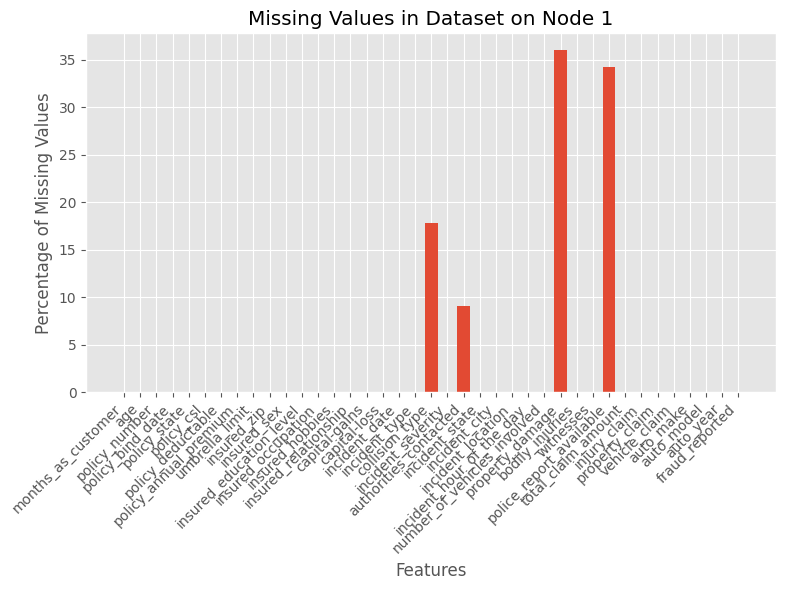

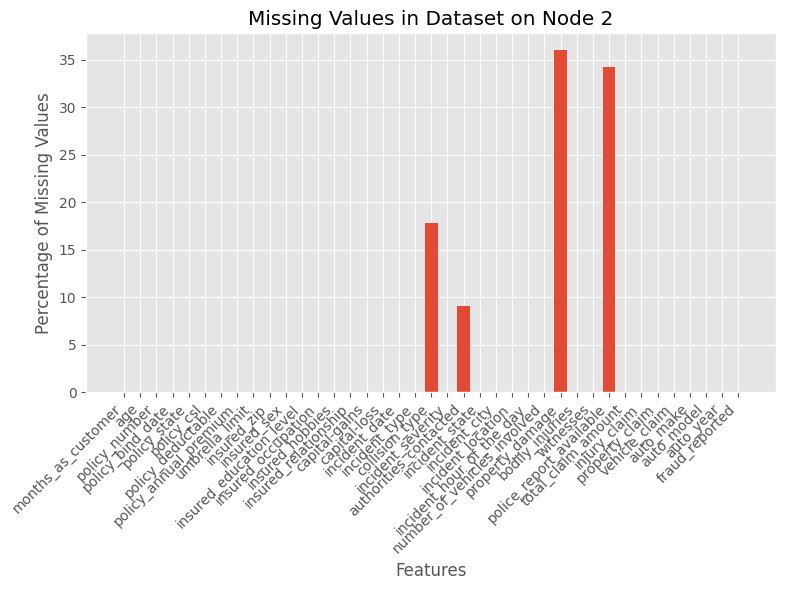

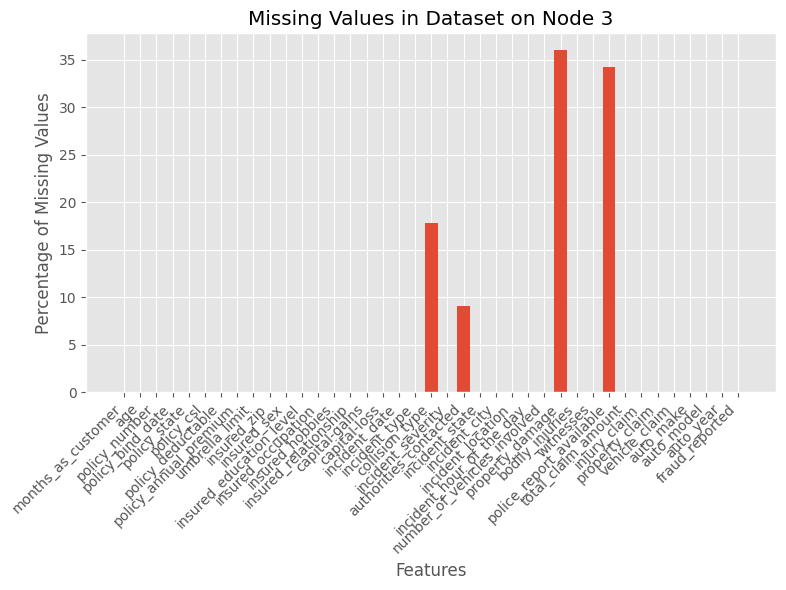

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib library

# Define a function to visualize missing values for each node's dataset
def visualize_missing_values(data, node_name):
    missing_values = data.isnull().sum()
    total_records = len(data)
    missing_percentage = (missing_values / total_records) * 100

    plt.figure(figsize=(8, 6))
    plt.bar(missing_values.index, missing_percentage)
    plt.xlabel('Features')
    plt.ylabel('Percentage of Missing Values')
    plt.title(f'Missing Values in Dataset on {node_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Visualize missing values for each node's dataset
visualize_missing_values(node1_data, "Node 1")
visualize_missing_values(node2_data, "Node 2")
visualize_missing_values(node3_data, "Node 3")


In [ ]:
# Define a function to fill missing values for a specific column with the mode
def fill_missing_with_mode(data, column_name):
    mode_value = data[column_name].mode()[0]  # Calculate the mode
    data[column_name].fillna(mode_value, inplace=True)  # Fill missing values with mode
    return data

# Fill missing values for the 'collision_type' column for each node's dataset
node1_data = fill_missing_with_mode(node1_data, 'collision_type')
node2_data = fill_missing_with_mode(node2_data, 'collision_type')
node3_data = fill_missing_with_mode(node3_data, 'collision_type')

# Now, missing values for the 'collision_type' column have been filled with the mode value for each node's dataset


In [ ]:
# Define a function to fill missing values for a specific column with the mode
def fill_missing_with_mode(data, column_name):
    mode_value = data[column_name].mode()[0]  # Calculate the mode
    data[column_name].fillna(mode_value, inplace=True)  # Fill missing values with mode
    return data

# Fill missing values for the 'property_damage' column for each node's dataset
node1_data = fill_missing_with_mode(node1_data, 'property_damage')
node2_data = fill_missing_with_mode(node2_data, 'property_damage')
node3_data = fill_missing_with_mode(node3_data, 'property_damage')

# Now, missing values for the 'property_damage' column have been filled with the mode value for each node's dataset


In [ ]:



# Define a function to fill missing values for a specific column with the mode
def fill_missing_with_mode(data, column_name):
    mode_value = data[column_name].mode()[0]  # Calculate the mode
    data[column_name].fillna(mode_value, inplace=True)  # Fill missing values with mode
    return data

# Fill missing values for the 'police_report_available' column for each node's dataset
node1_data = fill_missing_with_mode(node1_data, 'police_report_available')
node2_data = fill_missing_with_mode(node2_data, 'police_report_available')
node3_data = fill_missing_with_mode(node3_data, 'police_report_available')

# Now, missing values for the 'police_report_available' column have been filled with the mode value for each node's dataset


In [ ]:
# Define a function to calculate the count of missing values for each column
def count_missing_values(data, node_name):
    missing_values = data.isna().sum()
    print(f"Missing values in dataset on {node_name}:")
    print(missing_values)

# Calculate the count of missing values for each column in each node's dataset
count_missing_values(node1_data, "Node 1")
count_missing_values(node2_data, "Node 2")
count_missing_values(node3_data, "Node 3")


Missing values in dataset on Node 1:
months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_inju

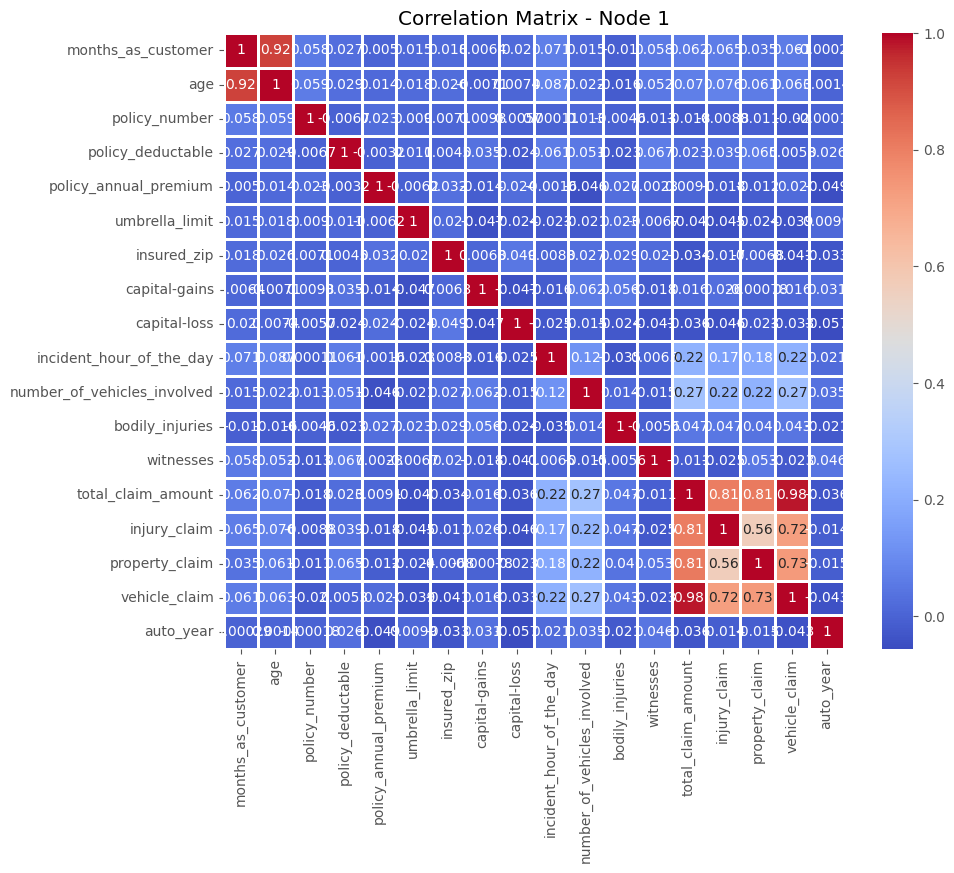

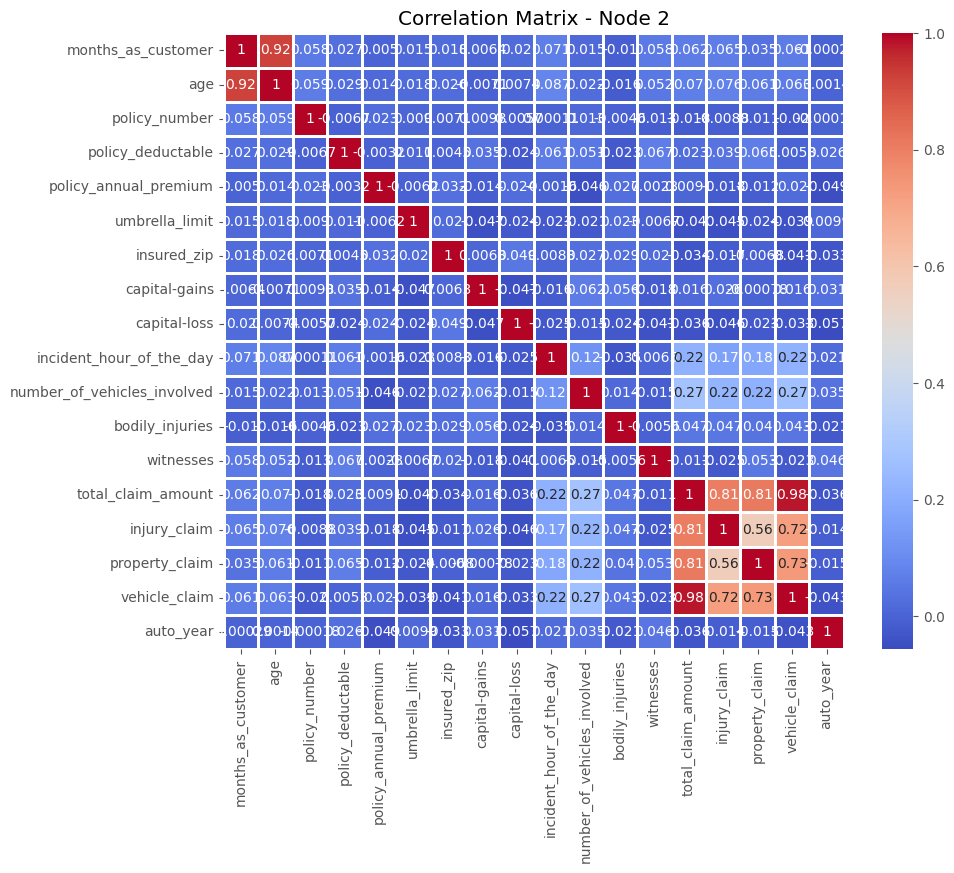

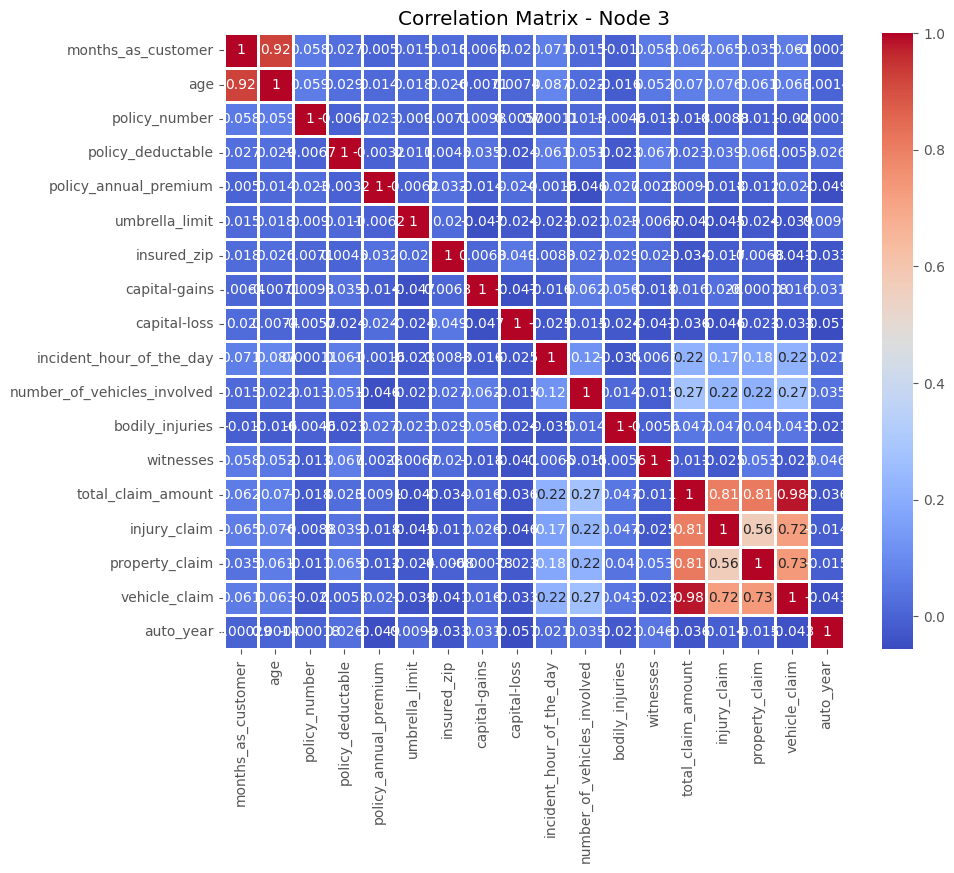

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to create a heatmap of the correlation matrix
def create_heatmap(data, node_name):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=['float64', 'int64'])

    plt.figure(figsize=(10, 8))
    corr = numeric_data.corr()
    sns.heatmap(data=corr, annot=True, fmt='.2g', linewidth=1, cmap='coolwarm')
    plt.title(f'Correlation Matrix - {node_name}')
    plt.show()

# Assuming you have node1_data, node2_data, and node3_data defined
# Create a heatmap of the correlation matrix for each node's dataset
create_heatmap(node1_data, "Node 1")
create_heatmap(node2_data, "Node 2")
create_heatmap(node3_data, "Node 3")


In [ ]:
# Define a function to calculate the number of unique values for each column
def count_unique_values(data, node_name):
    unique_values_count = data.nunique()
    print(f"Number of unique values in dataset on {node_name}:")
    print(unique_values_count)

# Calculate the number of unique values for each column in each node's dataset
count_unique_values(node1_data, "Node 1")
count_unique_values(node2_data, "Node 2")
count_unique_values(node3_data, "Node 3")


Number of unique values in dataset on Node 1:
months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles

In [ ]:
# Define columns to drop
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location',
           'incident_date','incident_state','incident_city','insured_hobbies','auto_make',
           'auto_model','auto_year']

# Define a function to drop unnecessary columns from each node's dataset
def drop_columns(data, columns_to_drop, node_name):
    data.drop(columns_to_drop, inplace=True, axis=1)
    print(f"Columns dropped from dataset on {node_name}:")
    print(data.head())  # Optionally print the dataset after dropping columns

# Drop unnecessary columns for each node's dataset
drop_columns(node1_data, to_drop, "Node 1")
drop_columns(node2_data, to_drop, "Node 2")
drop_columns(node3_data, to_drop, "Node 3")


Columns dropped from dataset on Node 1:
   months_as_customer  age policy_csl  policy_deductable  \
0                 328   48    250/500               1000   
1                 228   42    250/500               2000   
2                 134   29    100/300               2000   
3                 256   41    250/500               2000   
4                 228   44   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_relationship  ...  number_of_vehicles_involved  \
0       craft-repair              husba

In [ ]:
# Define a function to inspect the first few rows of each node's dataset
def inspect_data_head(data, node_name):
    print(f"First few rows of the dataset on {node_name}:")
    print(data.head())

# Inspect the first few rows of each node's dataset
inspect_data_head(node1_data, "Node 1")
inspect_data_head(node2_data, "Node 2")
inspect_data_head(node3_data, "Node 3")


First few rows of the dataset on Node 1:
   months_as_customer  age policy_csl  policy_deductable  \
0                 328   48    250/500               1000   
1                 228   42    250/500               2000   
2                 134   29    100/300               2000   
3                 256   41    250/500               2000   
4                 228   44   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_relationship  ...  number_of_vehicles_involved  \
0       craft-repair              husb

In [ ]:
# Define a function to display the first few rows of each node's dataset
def display_data_head(data, node_name):
    print(f"First few rows of the dataset on {node_name}:")
    print(data.head())

# Display the first few rows of each node's dataset
display_data_head(node1_data, "Node 1")
display_data_head(node2_data, "Node 2")
display_data_head(node3_data, "Node 3")


First few rows of the dataset on Node 1:
   months_as_customer  age policy_csl  policy_deductable  \
0                 328   48    250/500               1000   
1                 228   42    250/500               2000   
2                 134   29    100/300               2000   
3                 256   41    250/500               2000   
4                 228   44   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_relationship  ...  number_of_vehicles_involved  \
0       craft-repair              husb

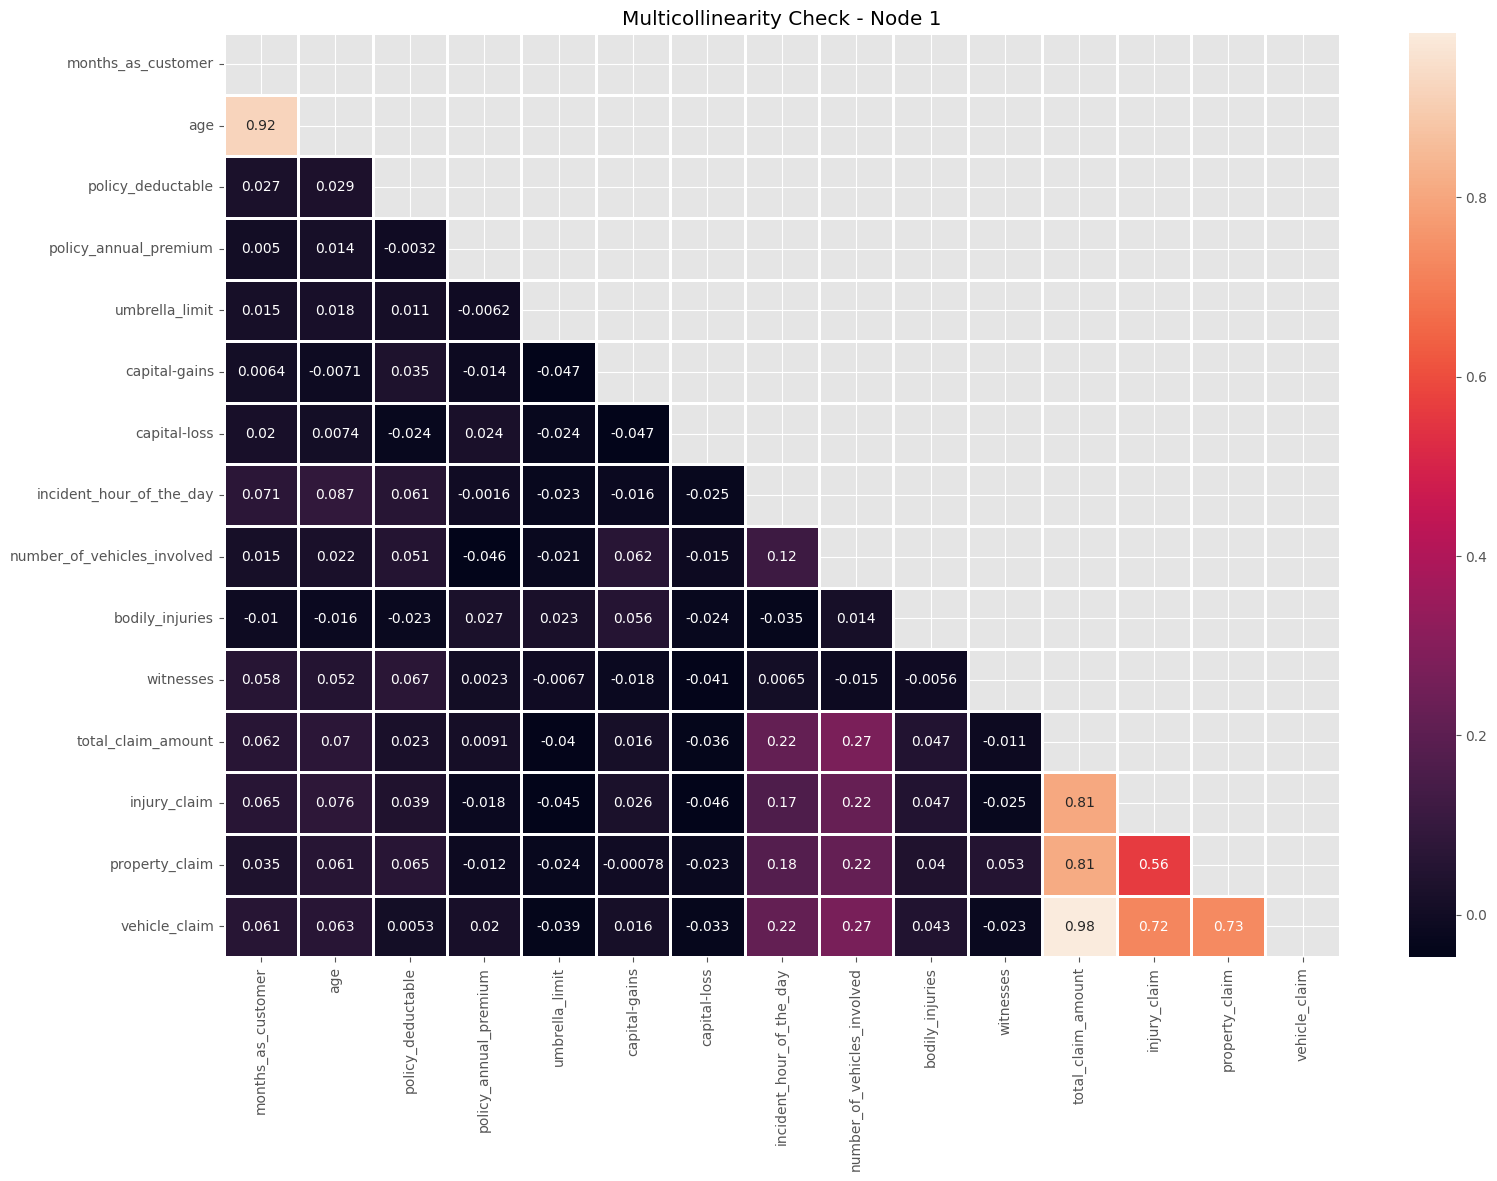

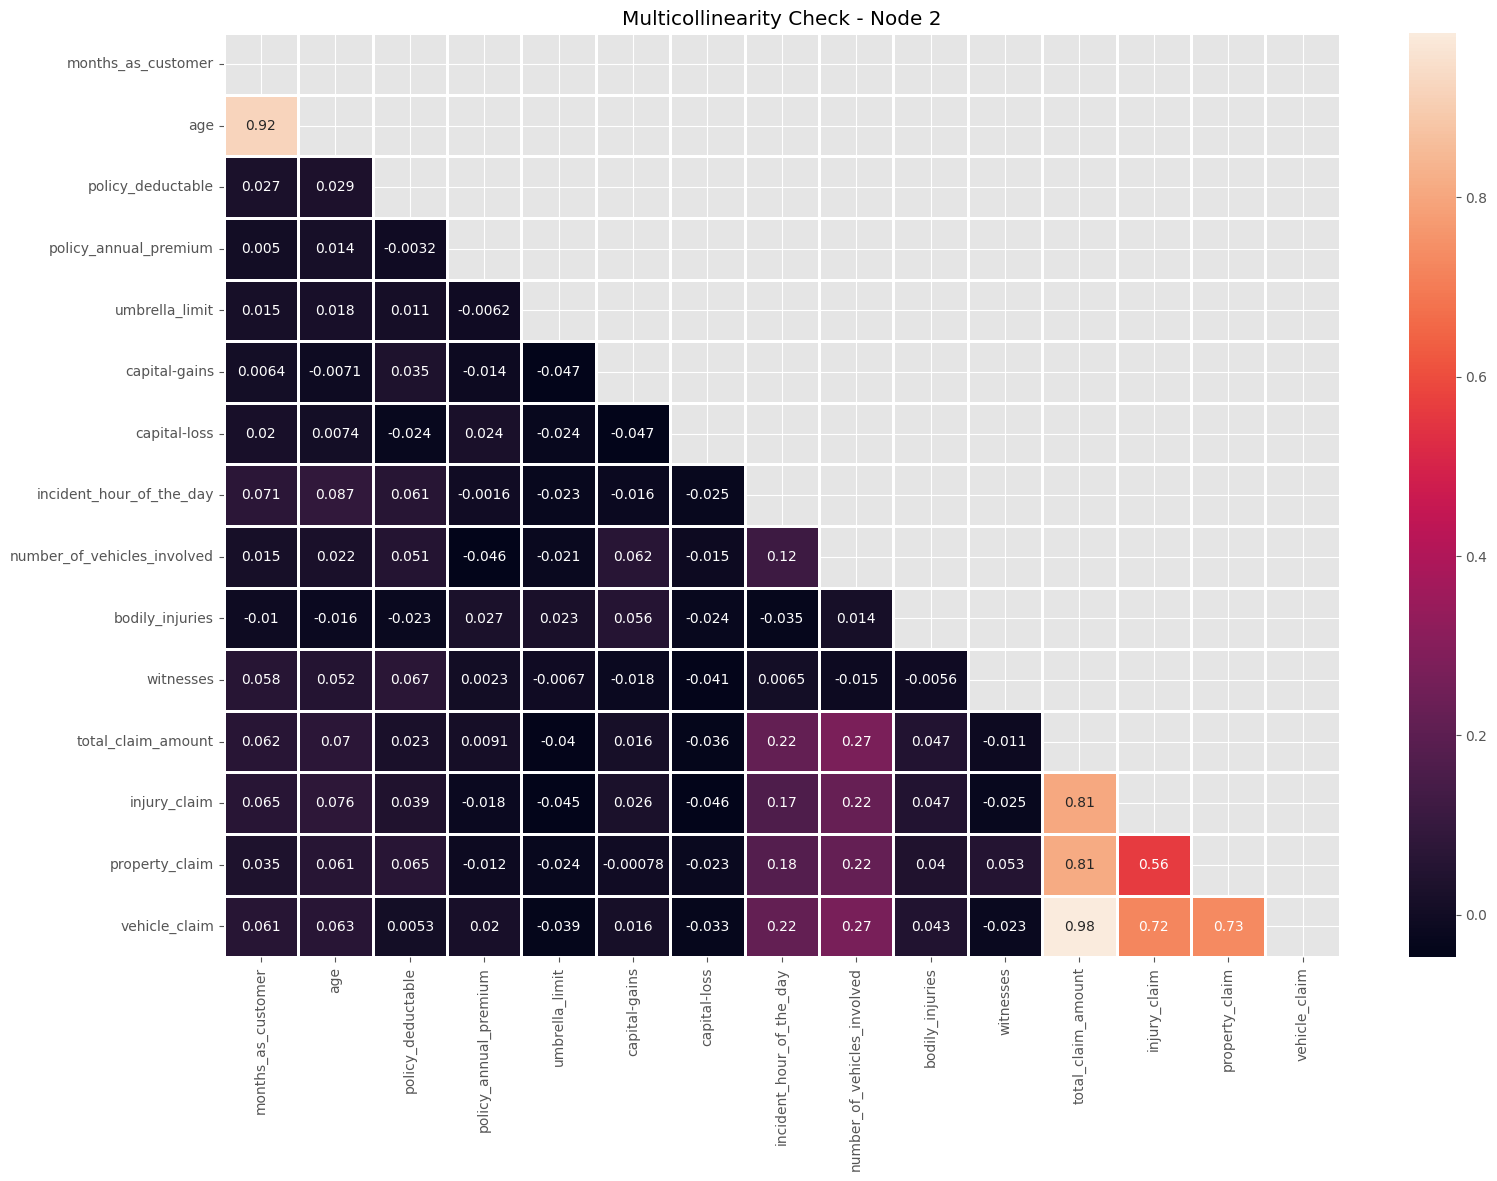

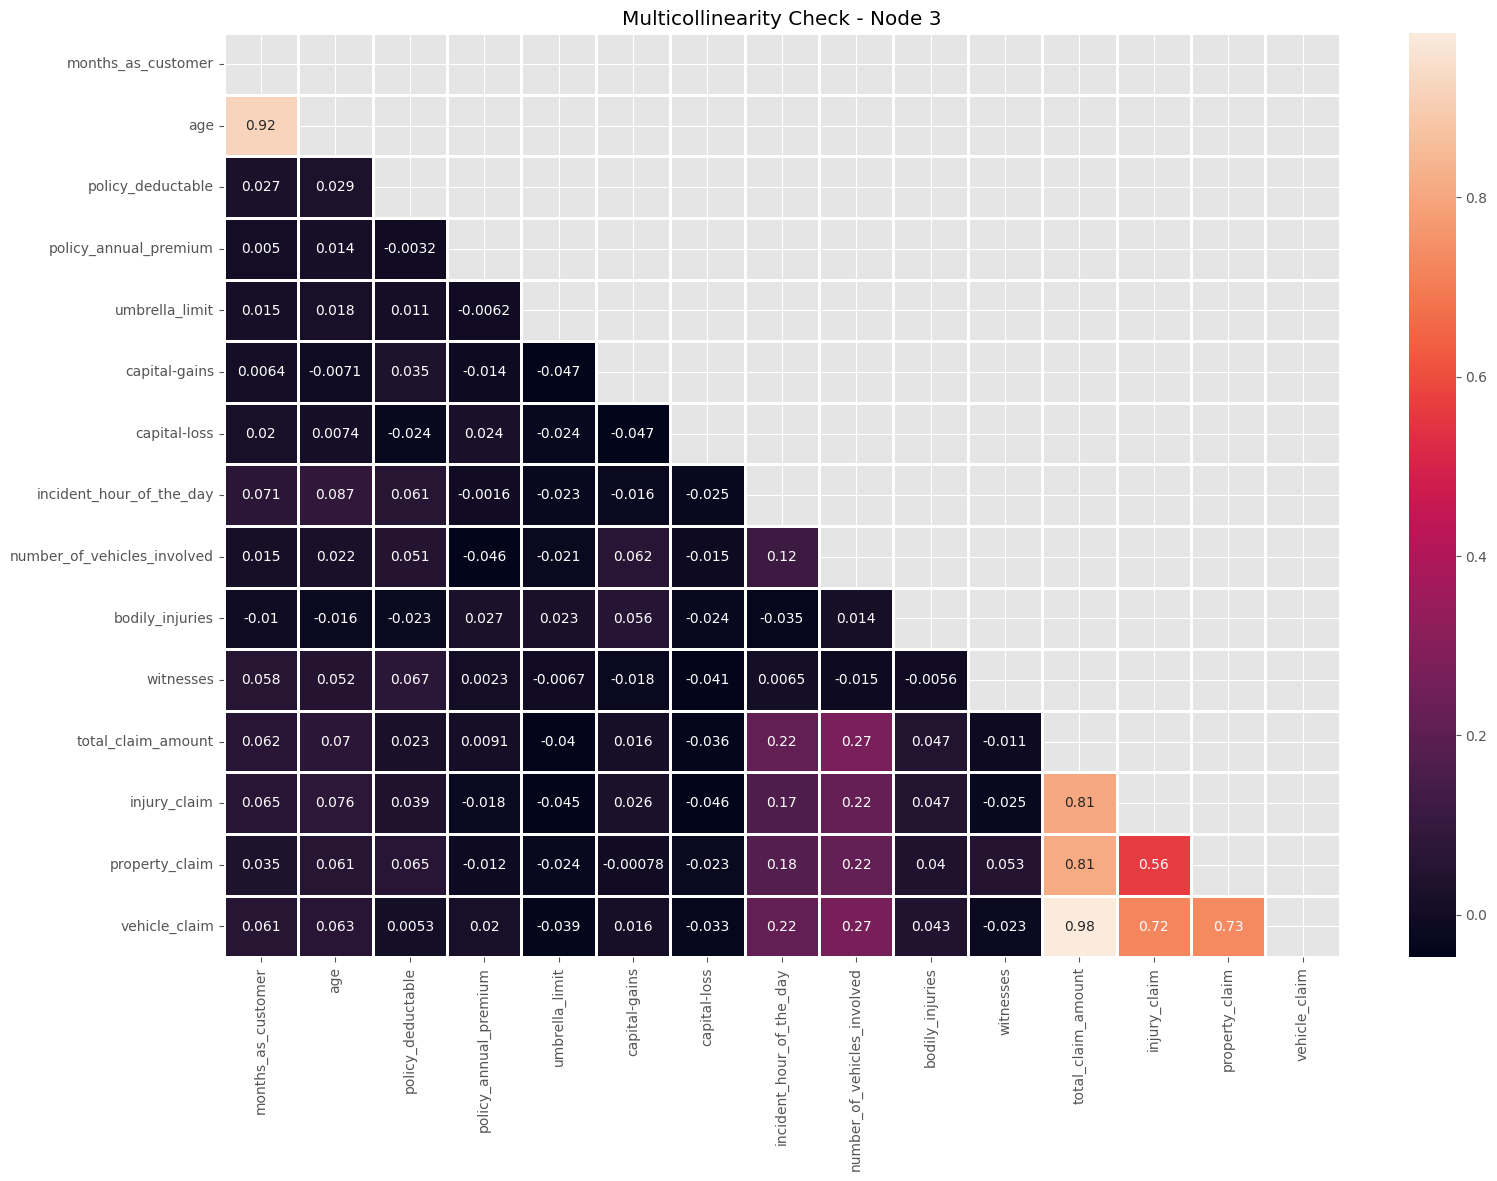

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a function to check for multicollinearity in the dataset
def check_multicollinearity(data, node_name):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=['float64', 'int64'])

    plt.figure(figsize=(18, 12))
    corr = numeric_data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(data=corr, mask=mask, annot=True, fmt='.2g', linewidth=1)
    plt.title(f'Multicollinearity Check - {node_name}')
    plt.show()

# Check for multicollinearity in each node's dataset
check_multicollinearity(node1_data, "Node 1")
check_multicollinearity(node2_data, "Node 2")
check_multicollinearity(node3_data, "Node 3")


In [ ]:
# Define a function to drop columns from each node's dataset
def drop_columns(data, columns_to_drop, node_name):
    data.drop(columns=columns_to_drop, inplace=True, axis=1)
    print(f"Columns dropped from dataset on {node_name}:")
    print(data.head())  # Optionally print the dataset after dropping columns

# Columns to drop
columns_to_drop = ['age', 'total_claim_amount']

# Drop columns for each node's dataset
drop_columns(node1_data, columns_to_drop, "Node 1")
drop_columns(node2_data, columns_to_drop, "Node 2")
drop_columns(node3_data, columns_to_drop, "Node 3")


Columns dropped from dataset on Node 1:
   months_as_customer policy_csl  policy_deductable  policy_annual_premium  \
0                 328    250/500               1000                1406.91   
1                 228    250/500               2000                1197.22   
2                 134    100/300               2000                1413.14   
3                 256    250/500               2000                1415.74   
4                 228   500/1000               1000                1583.91   

   umbrella_limit insured_sex insured_education_level insured_occupation  \
0               0        MALE                      MD       craft-repair   
1         5000000        MALE                      MD  machine-op-inspct   
2         5000000      FEMALE                     PhD              sales   
3         6000000      FEMALE                     PhD       armed-forces   
4         6000000        MALE               Associate              sales   

  insured_relationship  capital-ga

In [ ]:
# Define a function to get information about each node's dataset
def get_dataset_info(data, node_name):
    print(f"Information about dataset on {node_name}:")
    print(data.info())

# Get information about each node's dataset
get_dataset_info(node1_data, "Node 1")
get_dataset_info(node2_data, "Node 2")
get_dataset_info(node3_data, "Node 3")


Information about dataset on Node 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-nu

In [ ]:
# Define a function to separate feature and target columns for each node's dataset
def separate_features_and_target(data, node_name):
    X = data.drop('fraud_reported', axis=1)  # Features
    y = data['fraud_reported']  # Target
    print(f"Features in dataset on {node_name}:")
    print(X.head())  # Optionally print the features
    print(f"Target in dataset on {node_name}:")
    print(y.head())  # Optionally print the target

# Separate features and target for each node's dataset
separate_features_and_target(node1_data, "Node 1")
separate_features_and_target(node2_data, "Node 2")
separate_features_and_target(node3_data, "Node 3")


Features in dataset on Node 1:
   months_as_customer policy_csl  policy_deductable  policy_annual_premium  \
0                 328    250/500               1000                1406.91   
1                 228    250/500               2000                1197.22   
2                 134    100/300               2000                1413.14   
3                 256    250/500               2000                1415.74   
4                 228   500/1000               1000                1583.91   

   umbrella_limit insured_sex insured_education_level insured_occupation  \
0               0        MALE                      MD       craft-repair   
1         5000000        MALE                      MD  machine-op-inspct   
2         5000000      FEMALE                     PhD              sales   
3         6000000      FEMALE                     PhD       armed-forces   
4         6000000        MALE               Associate              sales   

  insured_relationship  capital-gains  ... 

In [ ]:


# Assuming you have already loaded the datasets from each node and separated features and target
# X and y are assumed to be the feature and target datasets respectively for each node

# Define a function to extract categorical columns for each node's dataset
def extract_categorical_columns(X, node_name):
    cat_df = X.select_dtypes(include=['object'])  # Extract categorical columns
    print(f"Categorical columns in dataset on {node_name}:")
    print(cat_df.head())  # Optionally print the extracted categorical columns

# Extract categorical columns for each node's dataset
extract_categorical_columns(node1_data, "Node 1")
extract_categorical_columns(node2_data, "Node 2")
extract_categorical_columns(node3_data, "Node 3")


Categorical columns in dataset on Node 1:
  policy_csl insured_sex insured_education_level insured_occupation  \
0    250/500        MALE                      MD       craft-repair   
1    250/500        MALE                      MD  machine-op-inspct   
2    100/300      FEMALE                     PhD              sales   
3    250/500      FEMALE                     PhD       armed-forces   
4   500/1000        MALE               Associate              sales   

  insured_relationship             incident_type   collision_type  \
0              husband  Single Vehicle Collision   Side Collision   
1       other-relative             Vehicle Theft   Rear Collision   
2            own-child   Multi-vehicle Collision   Rear Collision   
3            unmarried  Single Vehicle Collision  Front Collision   
4            unmarried             Vehicle Theft   Rear Collision   

  incident_severity authorities_contacted property_damage  \
0      Major Damage                Police             Y

In [ ]:

# Assuming you have already loaded the datasets from each node and extracted categorical columns
# cat_df is assumed to be the DataFrame containing categorical columns for each node

# Define a function to show the first few rows of the extracted categorical columns for each node's dataset
def show_categorical_columns(cat_df, node_name):
    print(f"First few rows of categorical columns in dataset on {node_name}:")
    print(cat_df.head())  # Show the first few rows of the extracted categorical columns

# Show the first few rows of the extracted categorical columns for each node's dataset
show_categorical_columns(node1_data, "Node 1")
show_categorical_columns(node2_data, "Node 2")
show_categorical_columns(node3_data, "Node 3")


First few rows of categorical columns in dataset on Node 1:
   months_as_customer policy_csl  policy_deductable  policy_annual_premium  \
0                 328    250/500               1000                1406.91   
1                 228    250/500               2000                1197.22   
2                 134    100/300               2000                1413.14   
3                 256    250/500               2000                1415.74   
4                 228   500/1000               1000                1583.91   

   umbrella_limit insured_sex insured_education_level insured_occupation  \
0               0        MALE                      MD       craft-repair   
1         5000000        MALE                      MD  machine-op-inspct   
2         5000000      FEMALE                     PhD              sales   
3         6000000      FEMALE                     PhD       armed-forces   
4         6000000        MALE               Associate              sales   

  insured_rela

In [ ]:
# Define a function to print unique values of each column in the categorical DataFrame for each node's dataset
def print_unique_values(cat_df, node_name):
    print(f"Unique values of categorical columns in dataset on {node_name}:")
    for col in cat_df.columns:
        unique_values = cat_df[col].unique()
        print(f"{col}: \n{unique_values}\n")

# Print unique values of categorical columns for each node's dataset
print_unique_values(node1_data, "Node 1")
print_unique_values(node2_data, "Node 2")
print_unique_values(node3_data, "Node 3")


Unique values of categorical columns in dataset on Node 1:
months_as_customer: 
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334

In [ ]:
# Define a function to print unique values of each column in the categorical DataFrame for each node's dataset
def print_unique_values(cat_df, node_name):
    print(f"Unique values of categorical columns in dataset on {node_name}:")
    for col in cat_df.columns:
        unique_values = cat_df[col].unique()
        print(f"{col}: \n{unique_values}\n")

# Print unique values of categorical columns for each node's dataset
print_unique_values(node1_data.select_dtypes(include=['object']), "Node 1")
print_unique_values(node2_data.select_dtypes(include=['object']), "Node 2")
print_unique_values(node3_data.select_dtypes(include=['object']), "Node 3")


Unique values of categorical columns in dataset on Node 1:
policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' nan 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']

fraud_reported:

In [ ]:
# Define a function to create dummy variables for categorical columns for each node's dataset
def create_dummy_variables(cat_df, node_name):
    cat_df = pd.get_dummies(cat_df, drop_first=True)  # Create dummy variables
    print(f"Dummy variables created for categorical columns in dataset on {node_name}:")
    print(cat_df.head())  # Optionally print the dataset after creating dummy variables
    return cat_df

# Create dummy variables for categorical columns for each node's dataset
dummy_variables_node1 = create_dummy_variables(node1_data, "Node 1")
dummy_variables_node2 = create_dummy_variables(node2_data, "Node 2")
dummy_variables_node3 = create_dummy_variables(node3_data, "Node 3")


Dummy variables created for categorical columns in dataset on Node 1:
   months_as_customer  policy_deductable  policy_annual_premium  \
0                 328               1000                1406.91   
1                 228               2000                1197.22   
2                 134               2000                1413.14   
3                 256               2000                1415.74   
4                 228               1000                1583.91   

   umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  \
0               0          53300             0                         5   
1         5000000              0             0                         8   
2         5000000          35100             0                         7   
3         6000000          48900        -62400                         5   
4         6000000          66000        -46000                        20   

   number_of_vehicles_involved  bodily_injuries  witnesses  ...  \
0  

In [ ]:
# Define a function to extract numerical columns for each node's dataset
def extract_numerical_columns(X, node_name):
    num_df = X.select_dtypes(include=['int64'])  # Extract numerical columns
    print(f"Numerical columns in dataset on {node_name}:")
    print(num_df.head())  # Optionally print the extracted numerical columns
    return num_df

# Extract numerical columns for each node's dataset
numerical_columns_node1 = extract_numerical_columns(node1_data, "Node 1")
numerical_columns_node2 = extract_numerical_columns(node2_data, "Node 2")
numerical_columns_node3 = extract_numerical_columns(node3_data, "Node 3")


Numerical columns in dataset on Node 1:
   months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  injury_claim  property_claim  veh

In [ ]:
# Define a function to combine numerical and categorical dataframes for each node's dataset
def combine_dataframes(numerical_df, categorical_df, node_name):
    combined_df = pd.concat([numerical_df, categorical_df], axis=1)  # Combine numerical and categorical dataframes
    print(f"Combined dataframe for dataset on {node_name}:")
    print(combined_df.head())  # Optionally print the combined dataframe
    return combined_df

# Combine numerical and categorical dataframes for each node's dataset
combined_data_node1 = combine_dataframes(numerical_columns_node1, dummy_variables_node1, "Node 1")
combined_data_node2 = combine_dataframes(numerical_columns_node2, dummy_variables_node2, "Node 2")
combined_data_node3 = combine_dataframes(numerical_columns_node3, dummy_variables_node3, "Node 3")


Combined dataframe for dataset on Node 1:
   months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  injury_claim  ...  \
0         

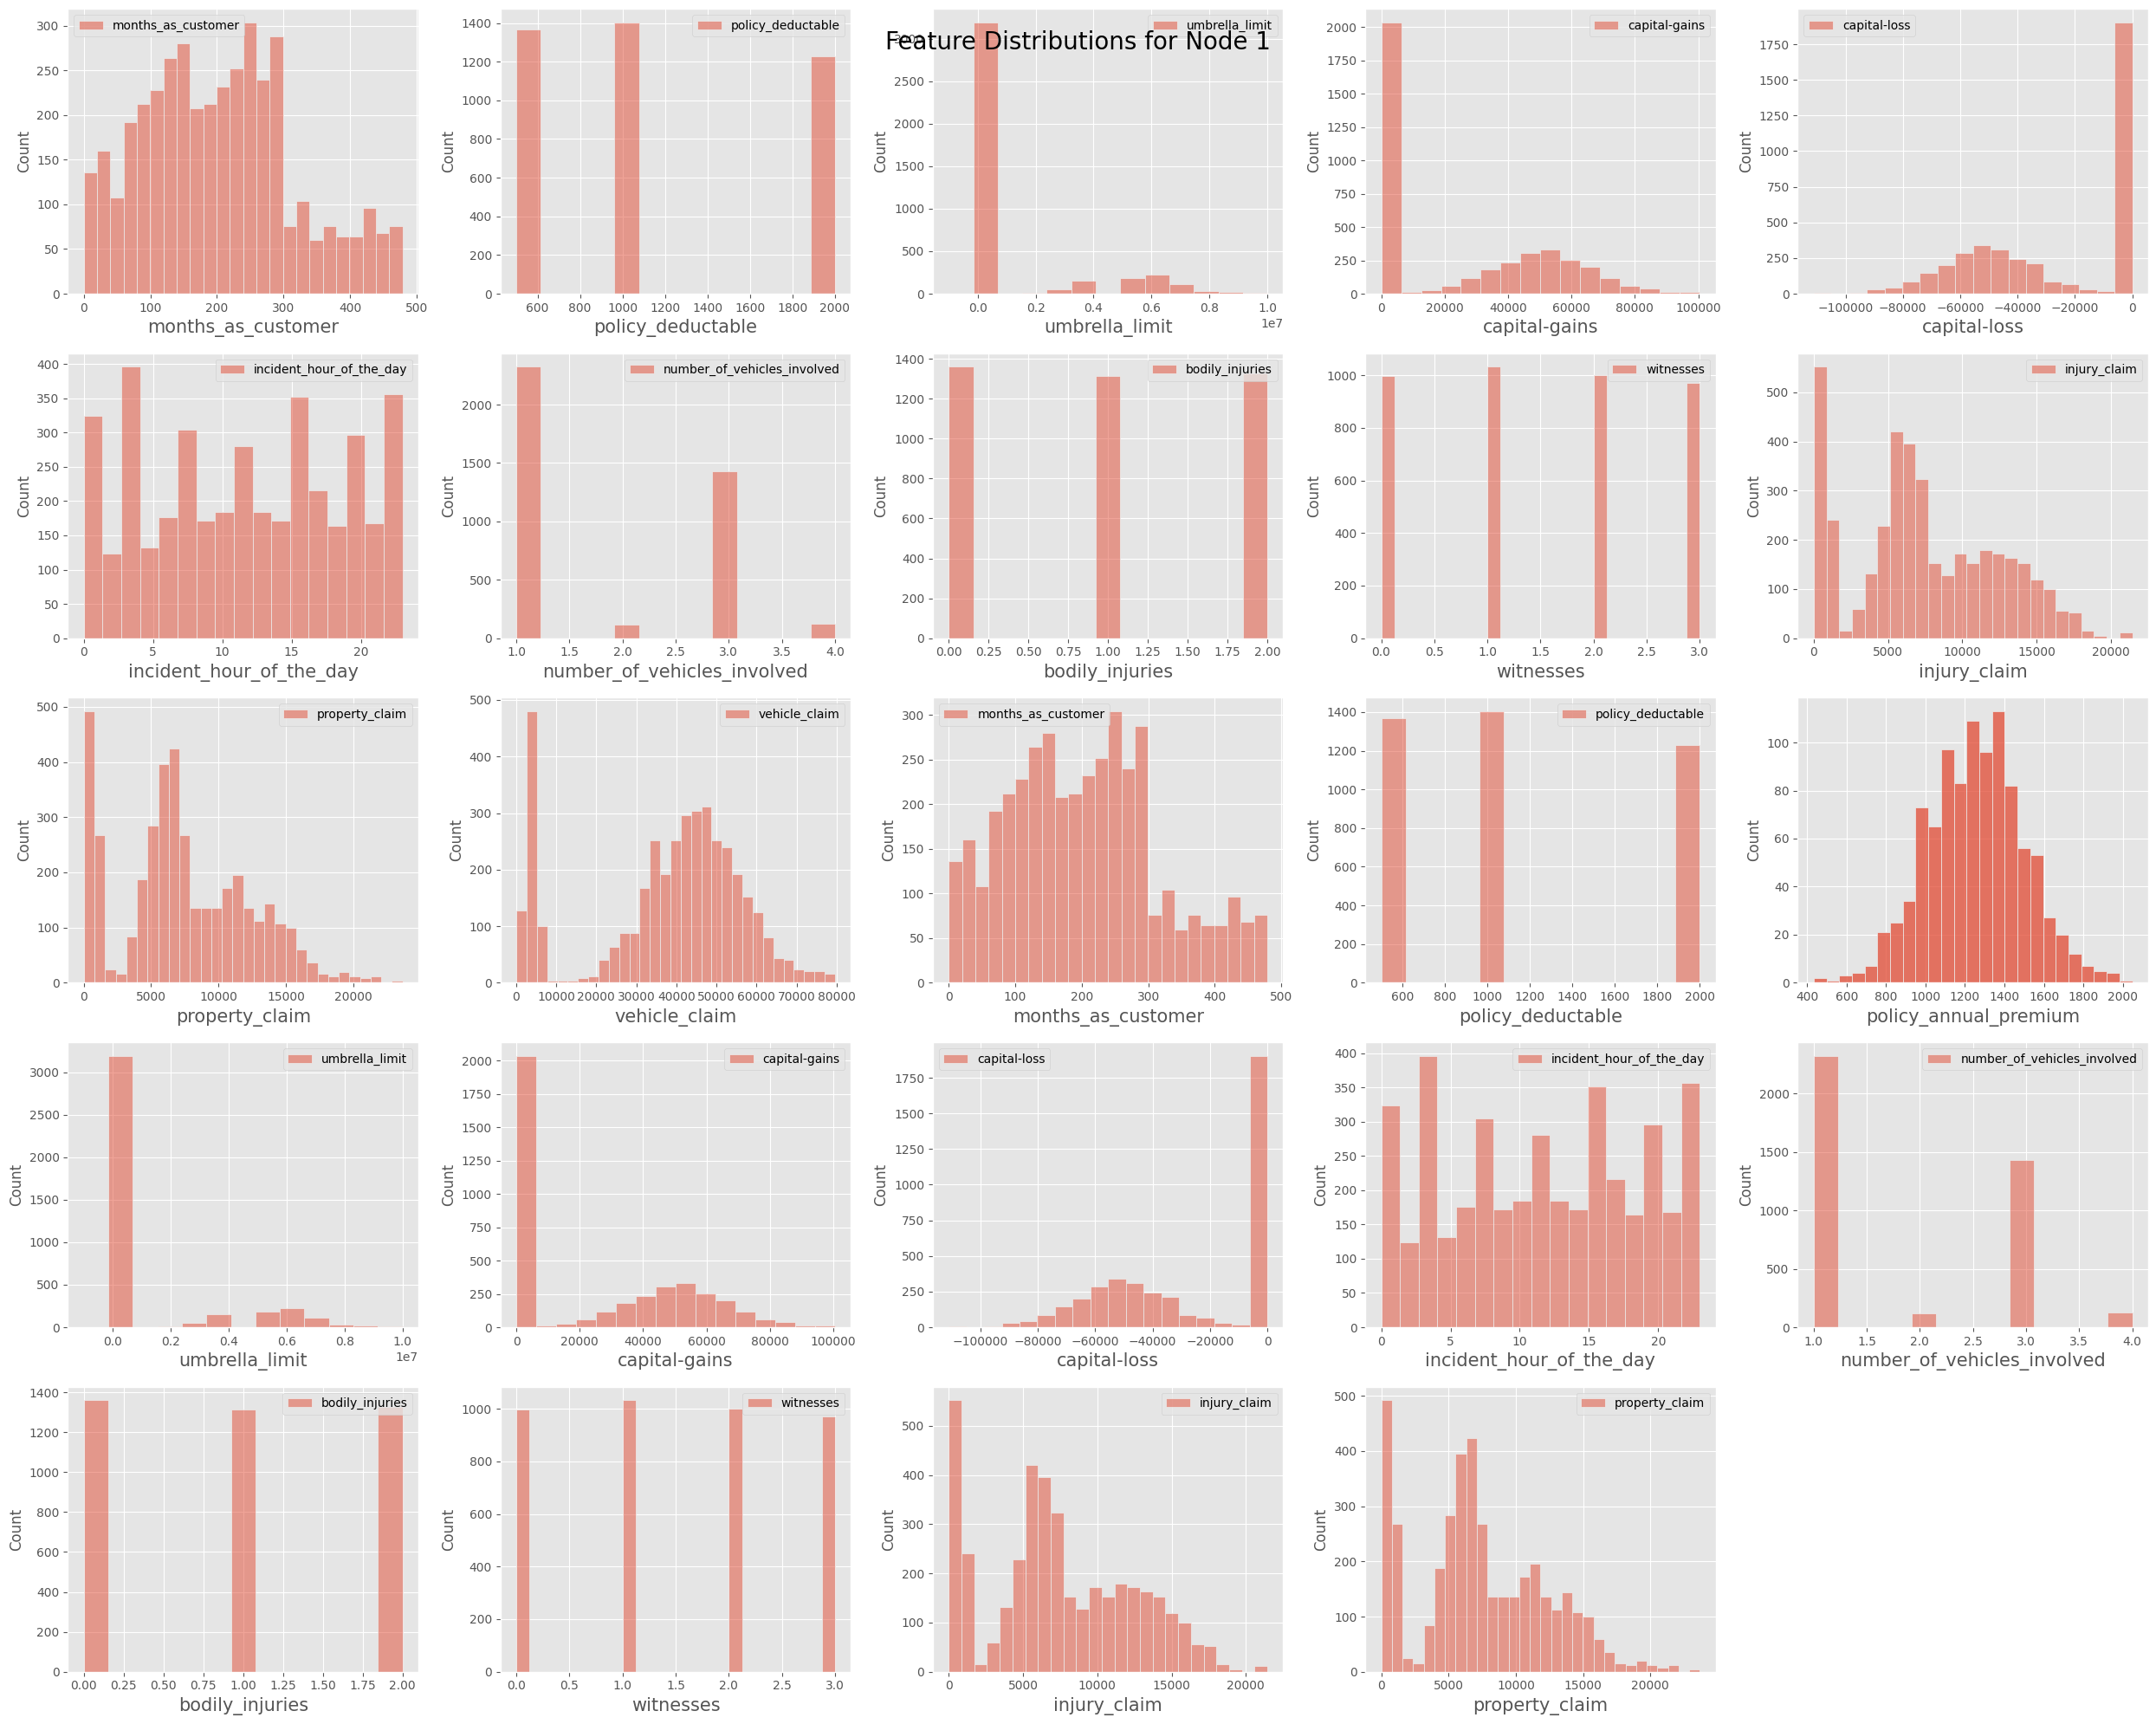

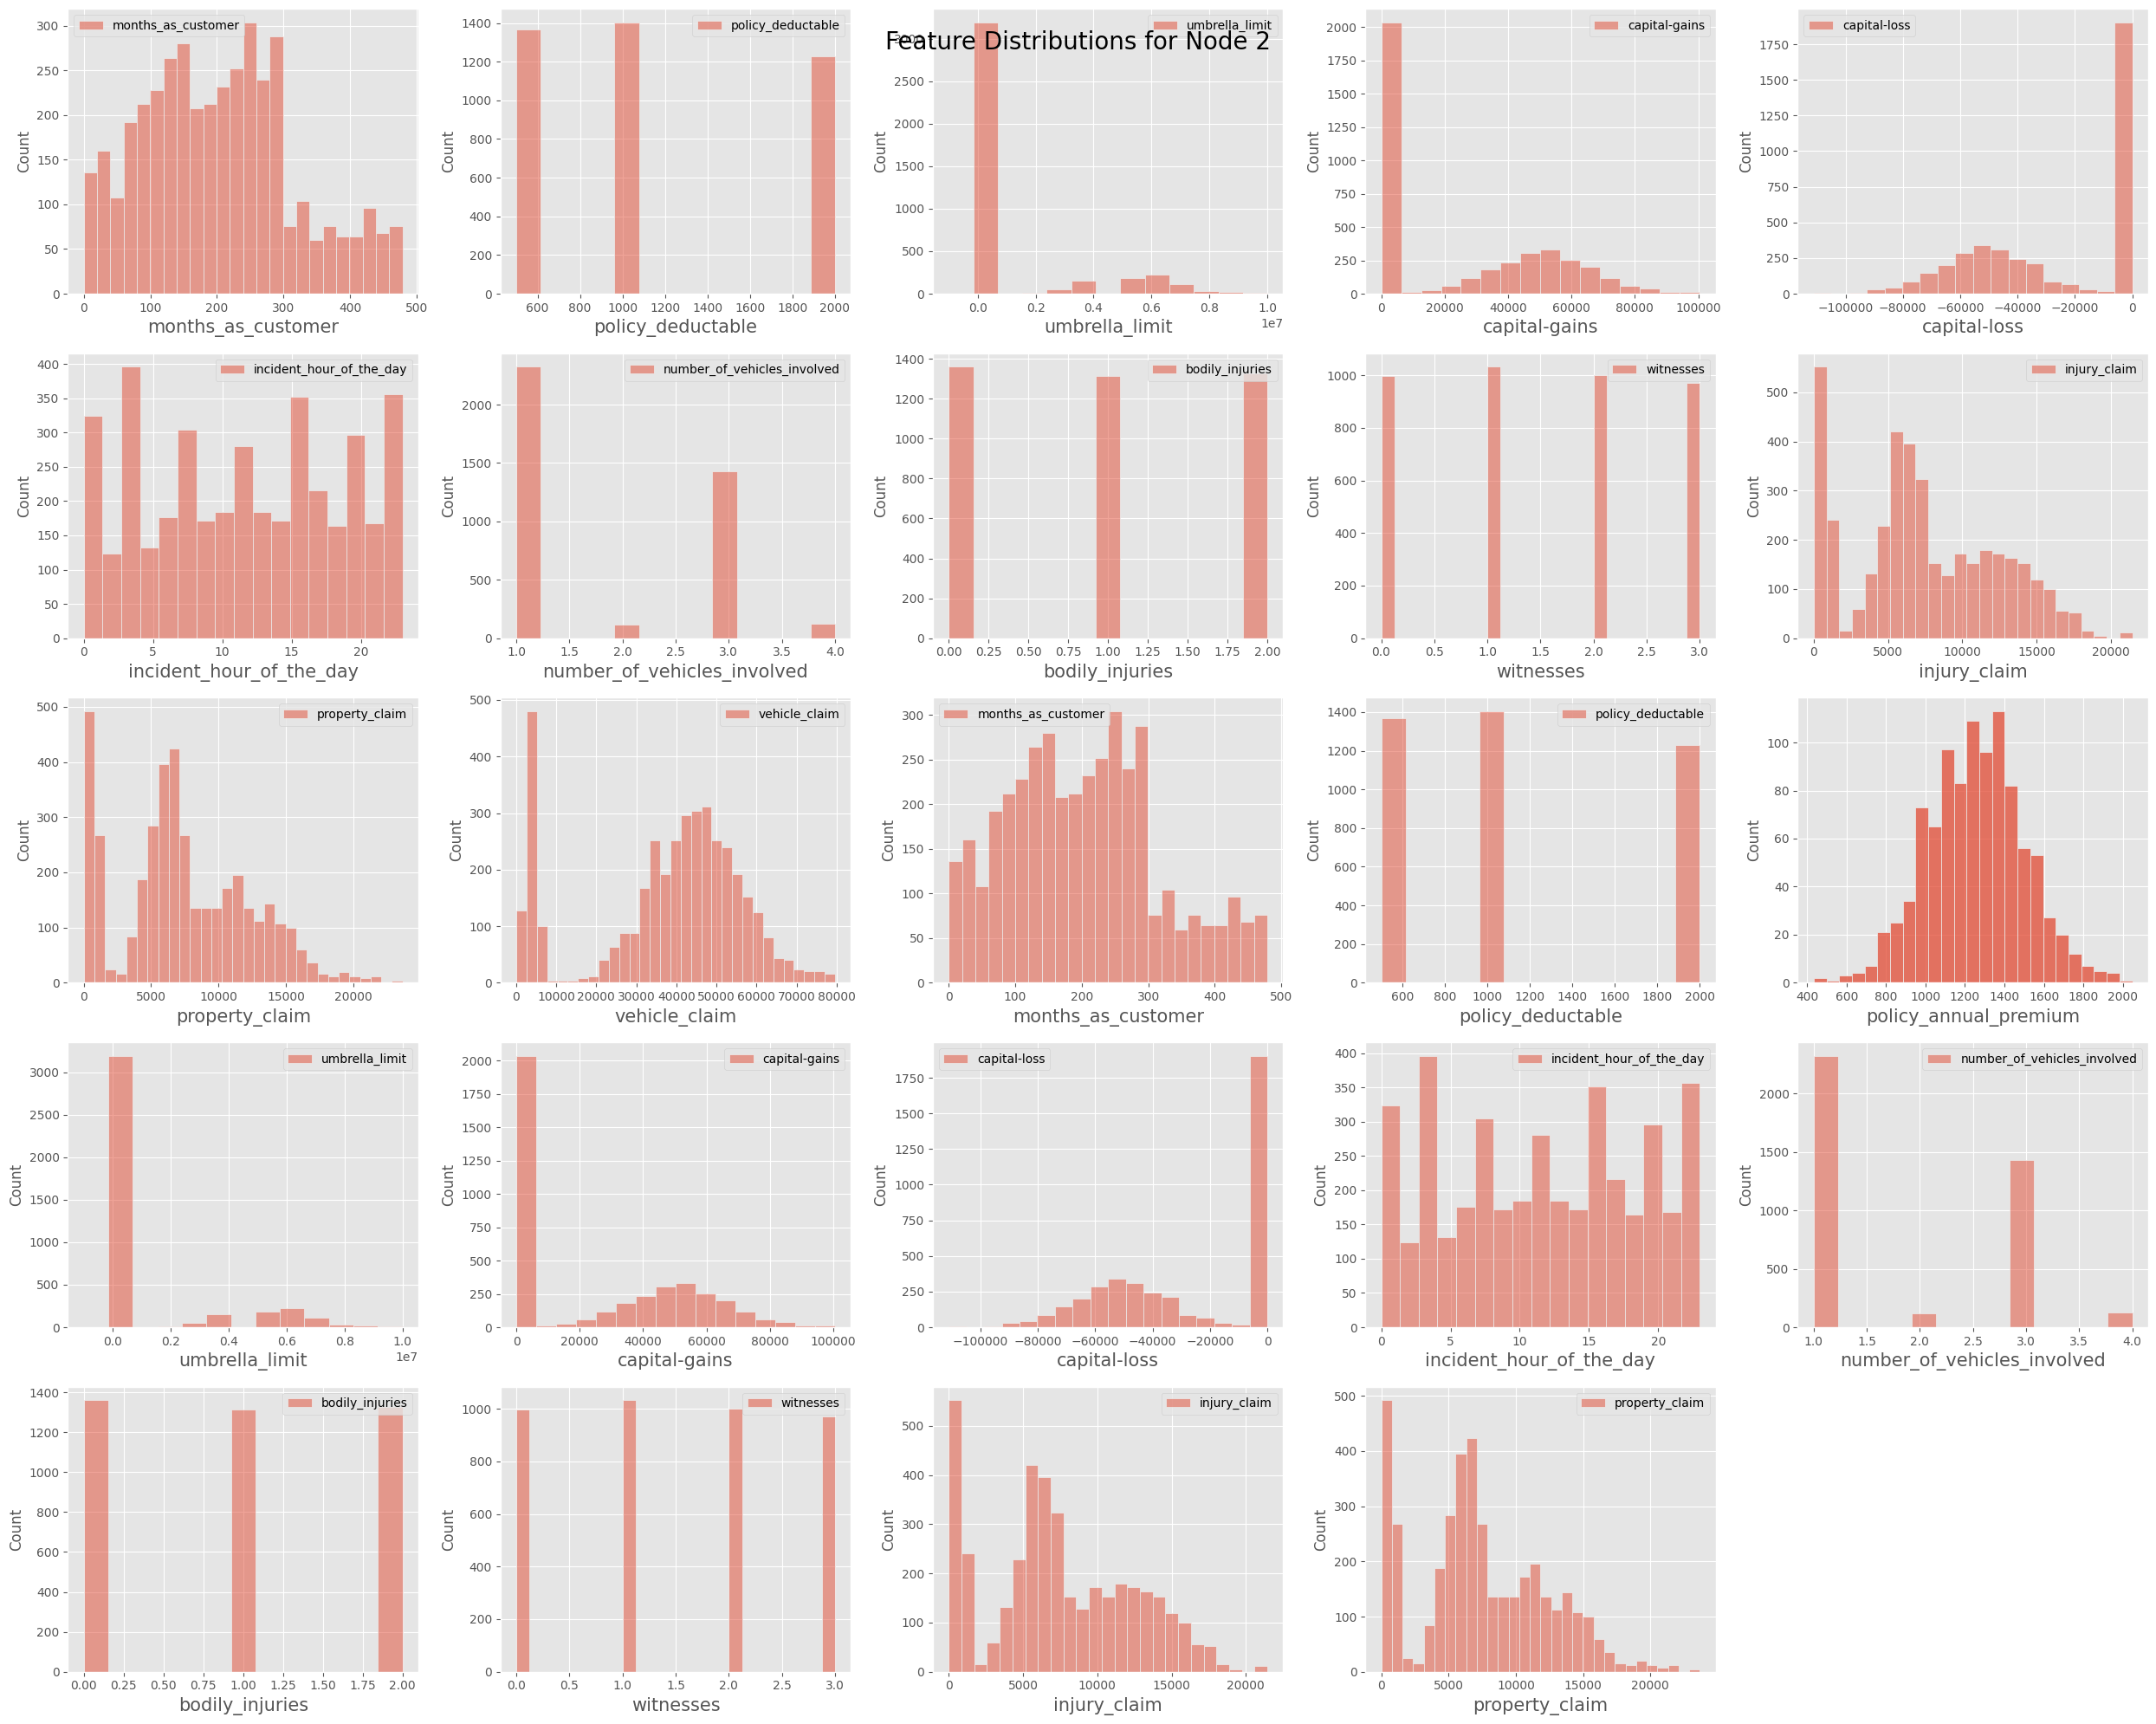

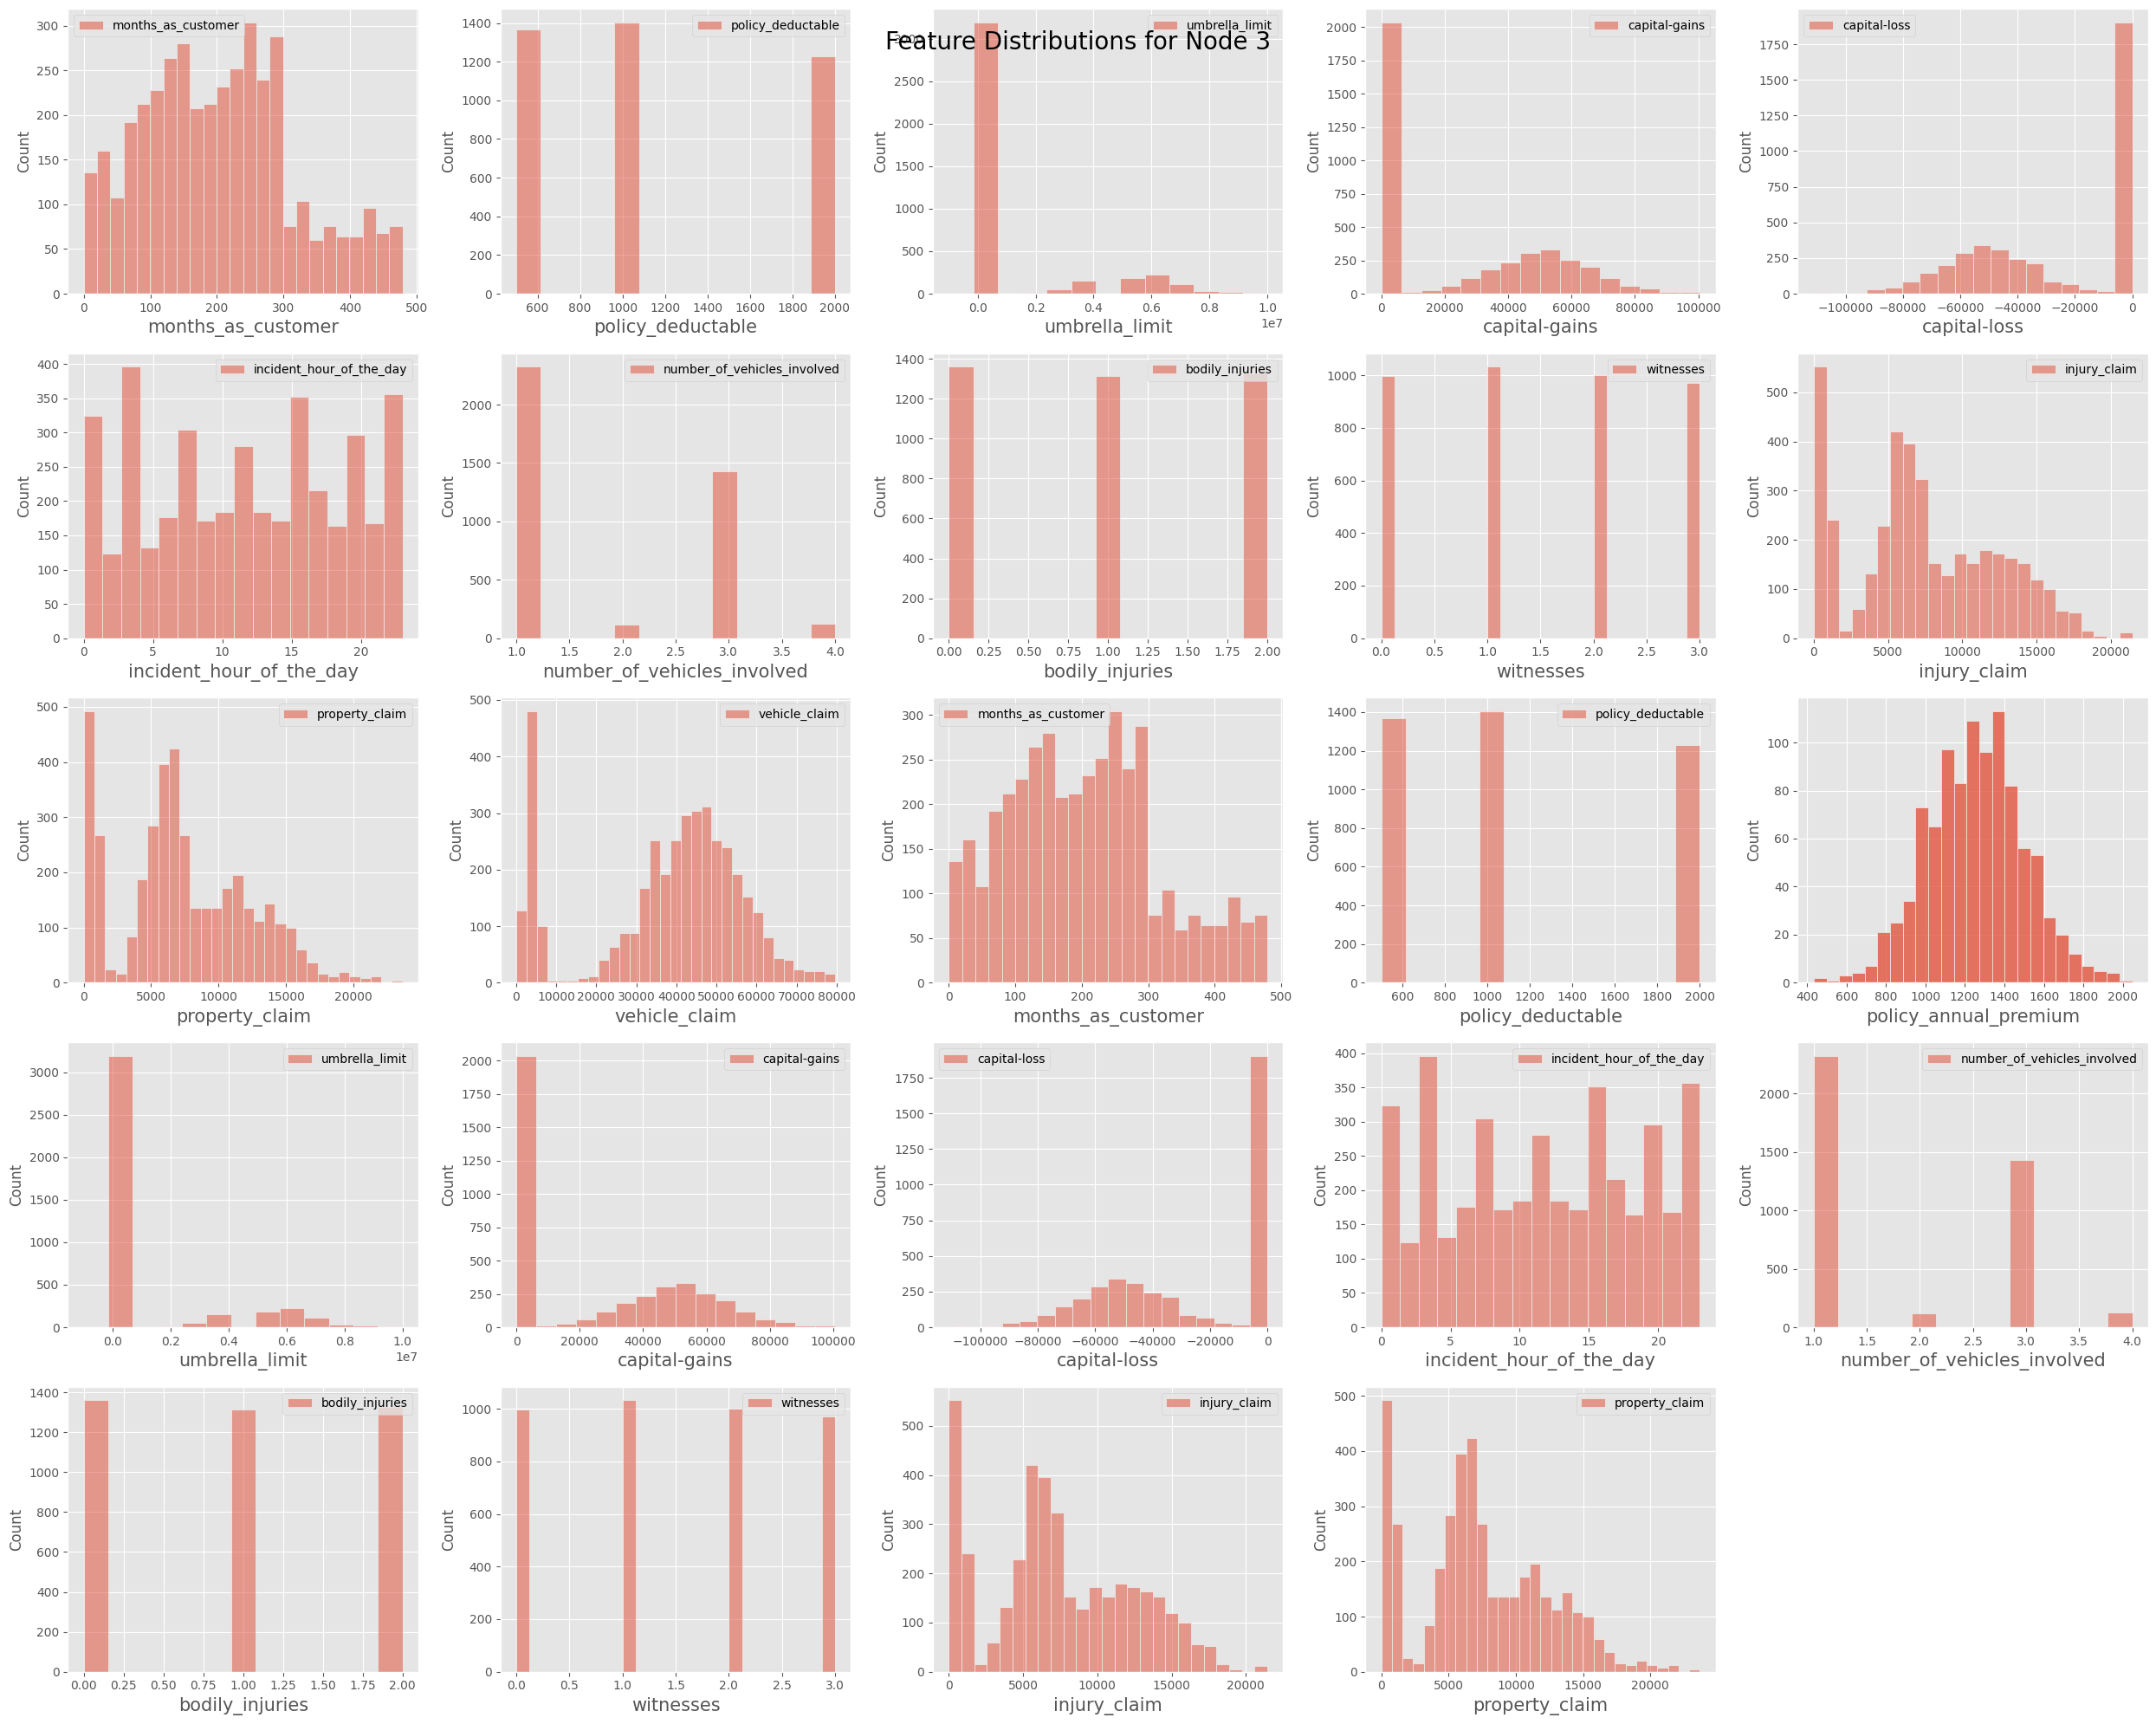

In [ ]:
import seaborn as sns

# Define a function to create distributions of features for each node's dataset
def plot_feature_distributions(data, node_name):
    plt.figure(figsize=(25, 20))
    plotnumber = 1
    for col in data.columns:
        if plotnumber <= 24:
            plt.subplot(5, 5, plotnumber)
            sns.histplot(data[col])  # Use histplot instead of distplot
            plt.xlabel(col, fontsize=15)
        plotnumber += 1
    plt.tight_layout()
    plt.suptitle(f"Feature Distributions for {node_name}", fontsize=20)
    plt.show()

# Create distributions of features for each node's dataset
plot_feature_distributions(combined_data_node1, "Node 1")
plot_feature_distributions(combined_data_node2, "Node 2")
plot_feature_distributions(combined_data_node3, "Node 3")


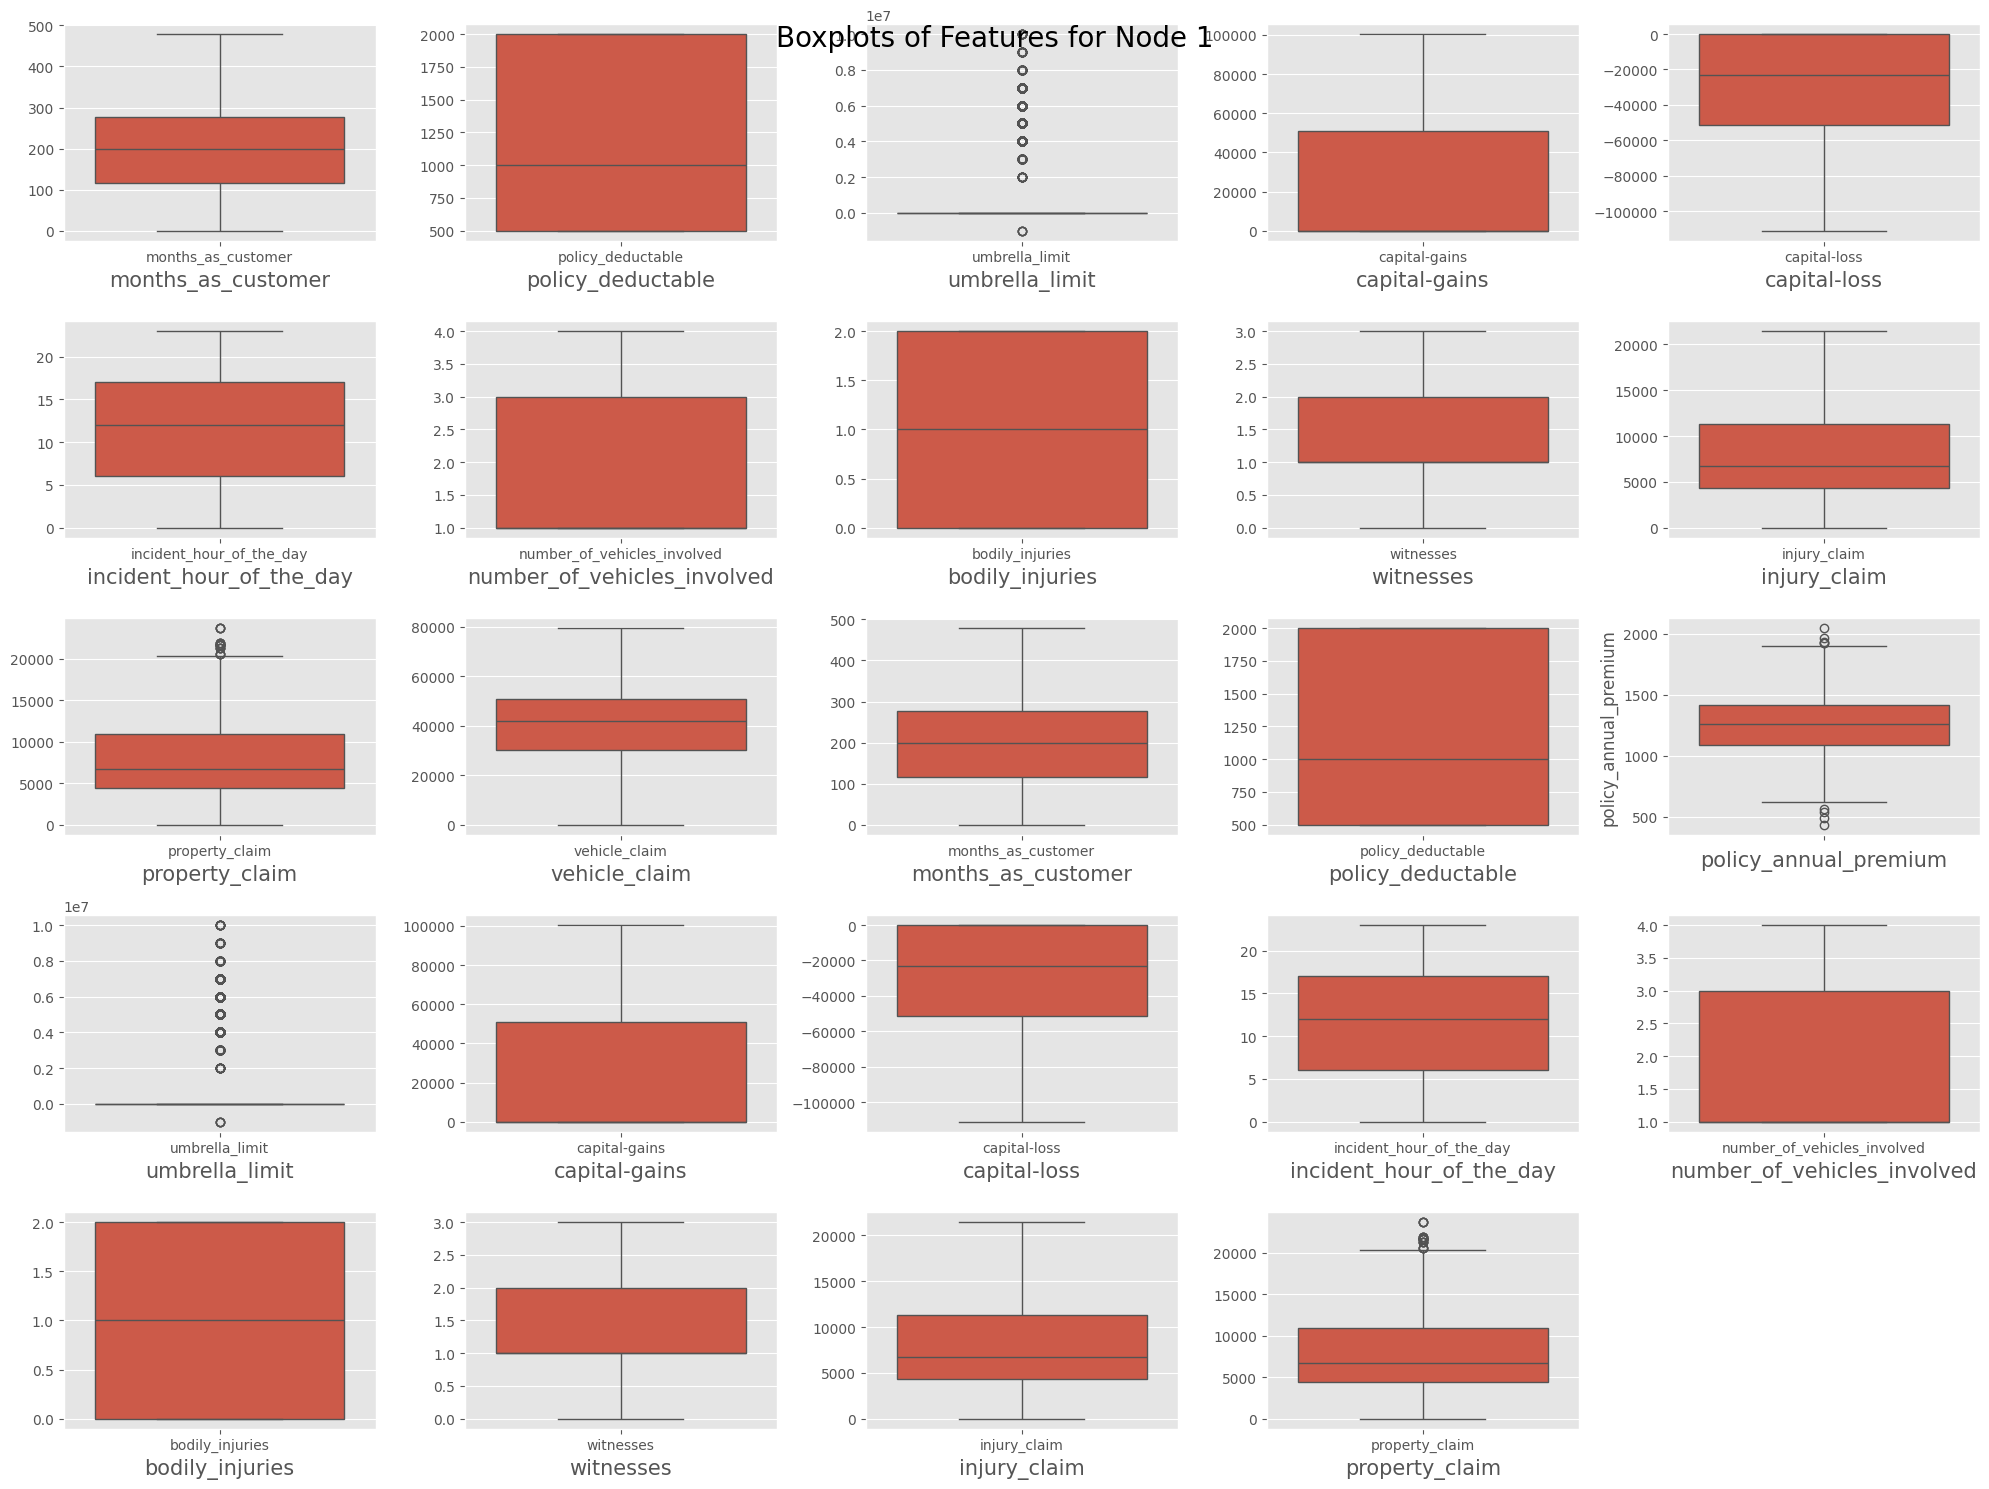

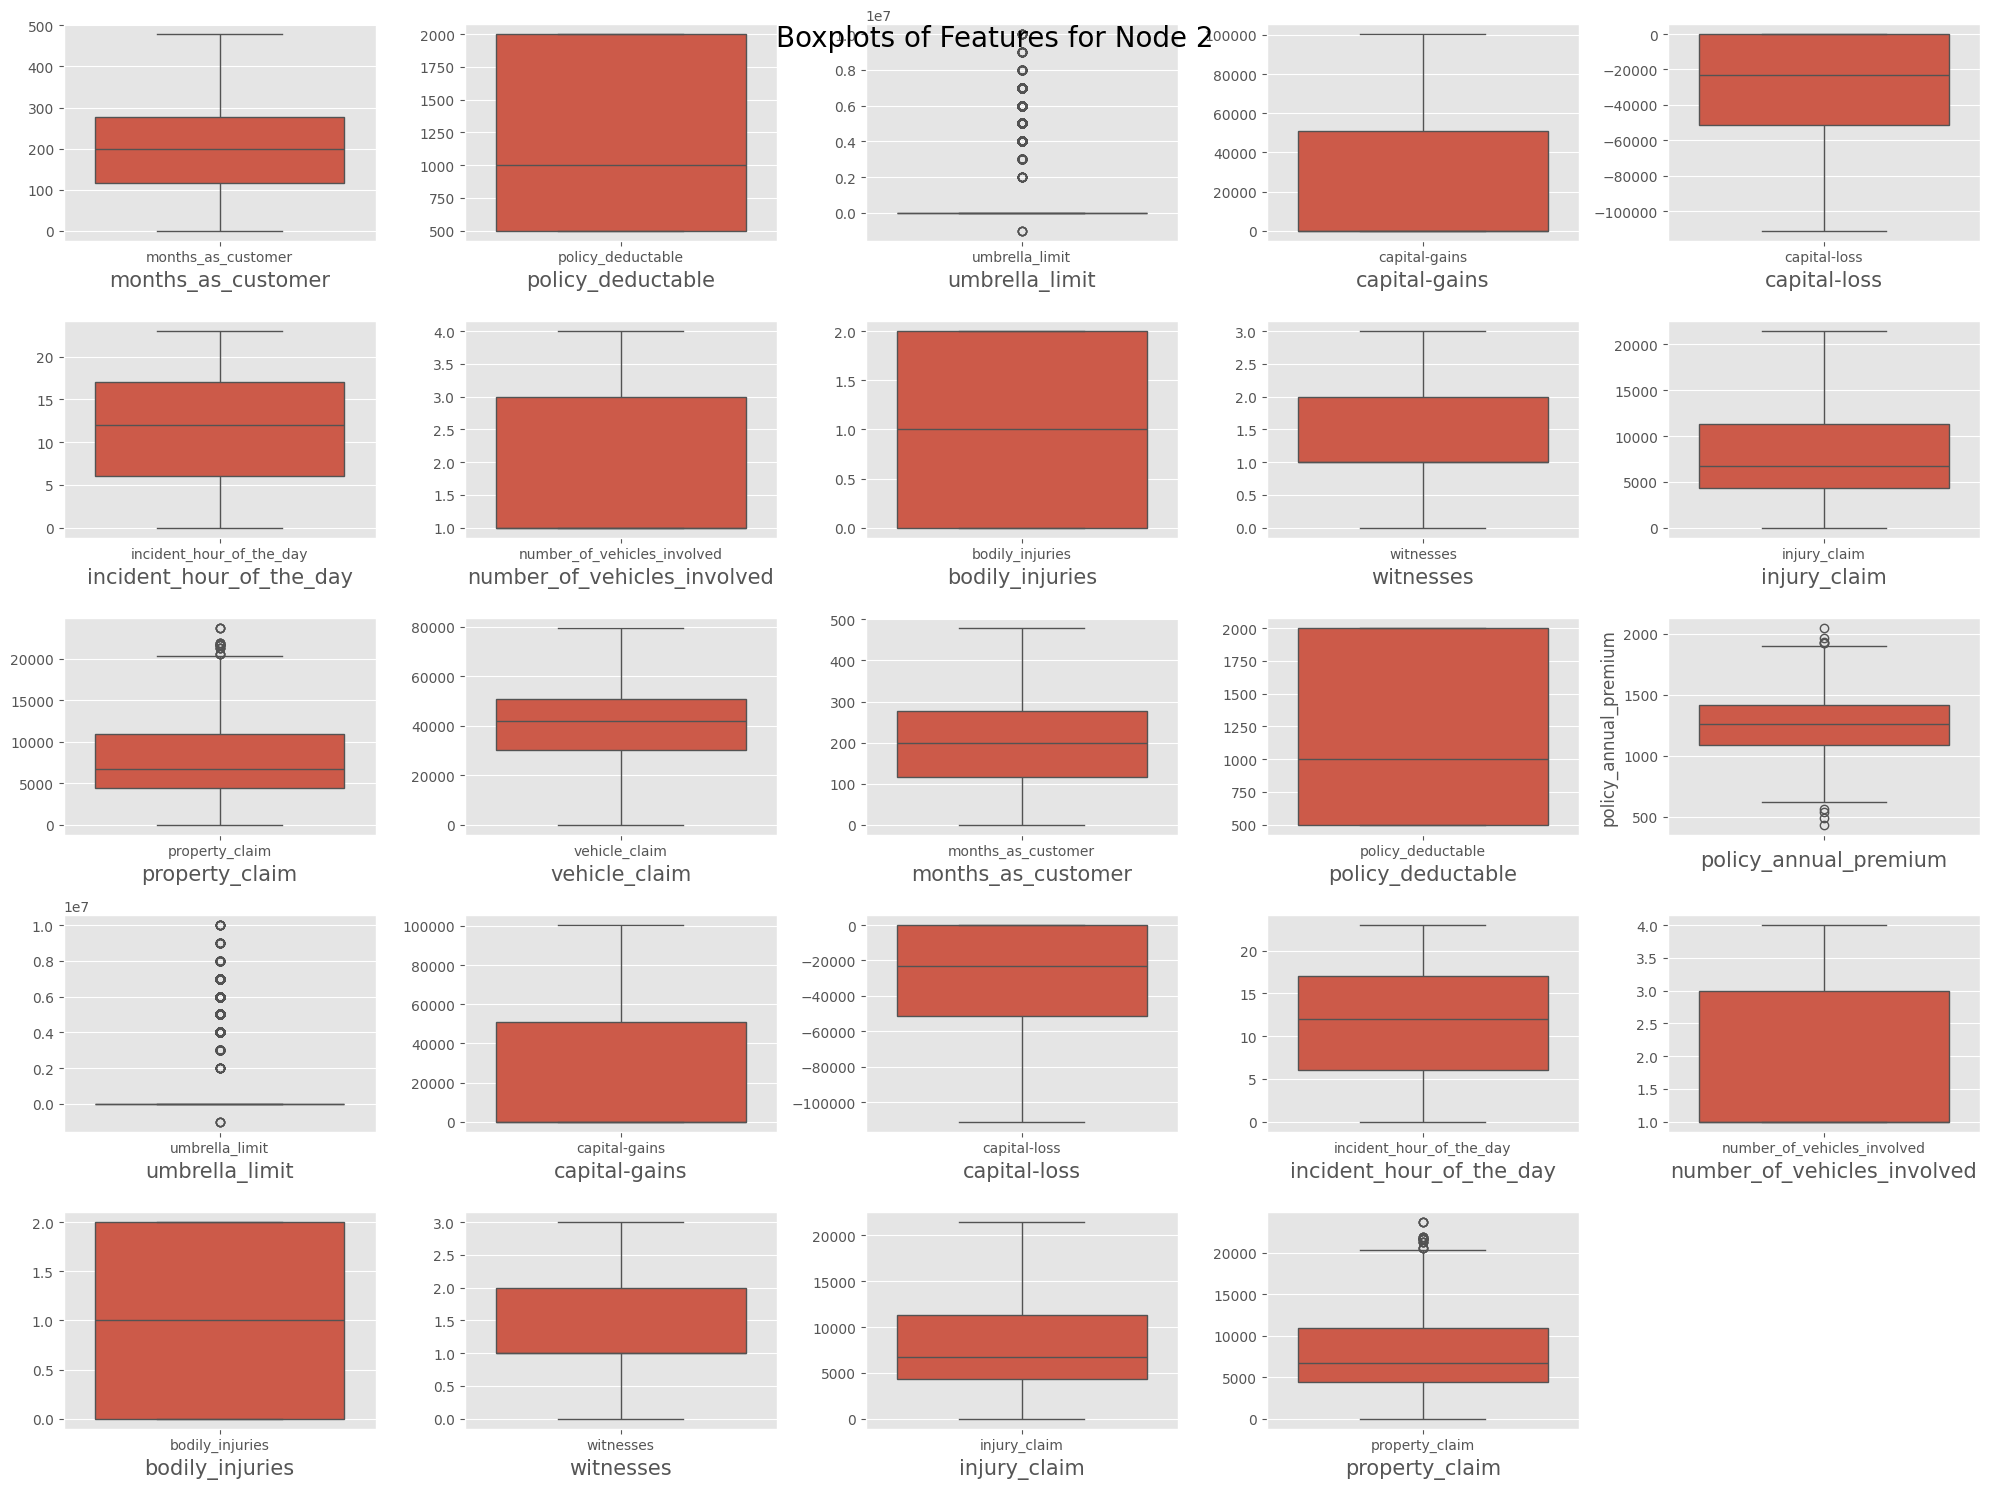

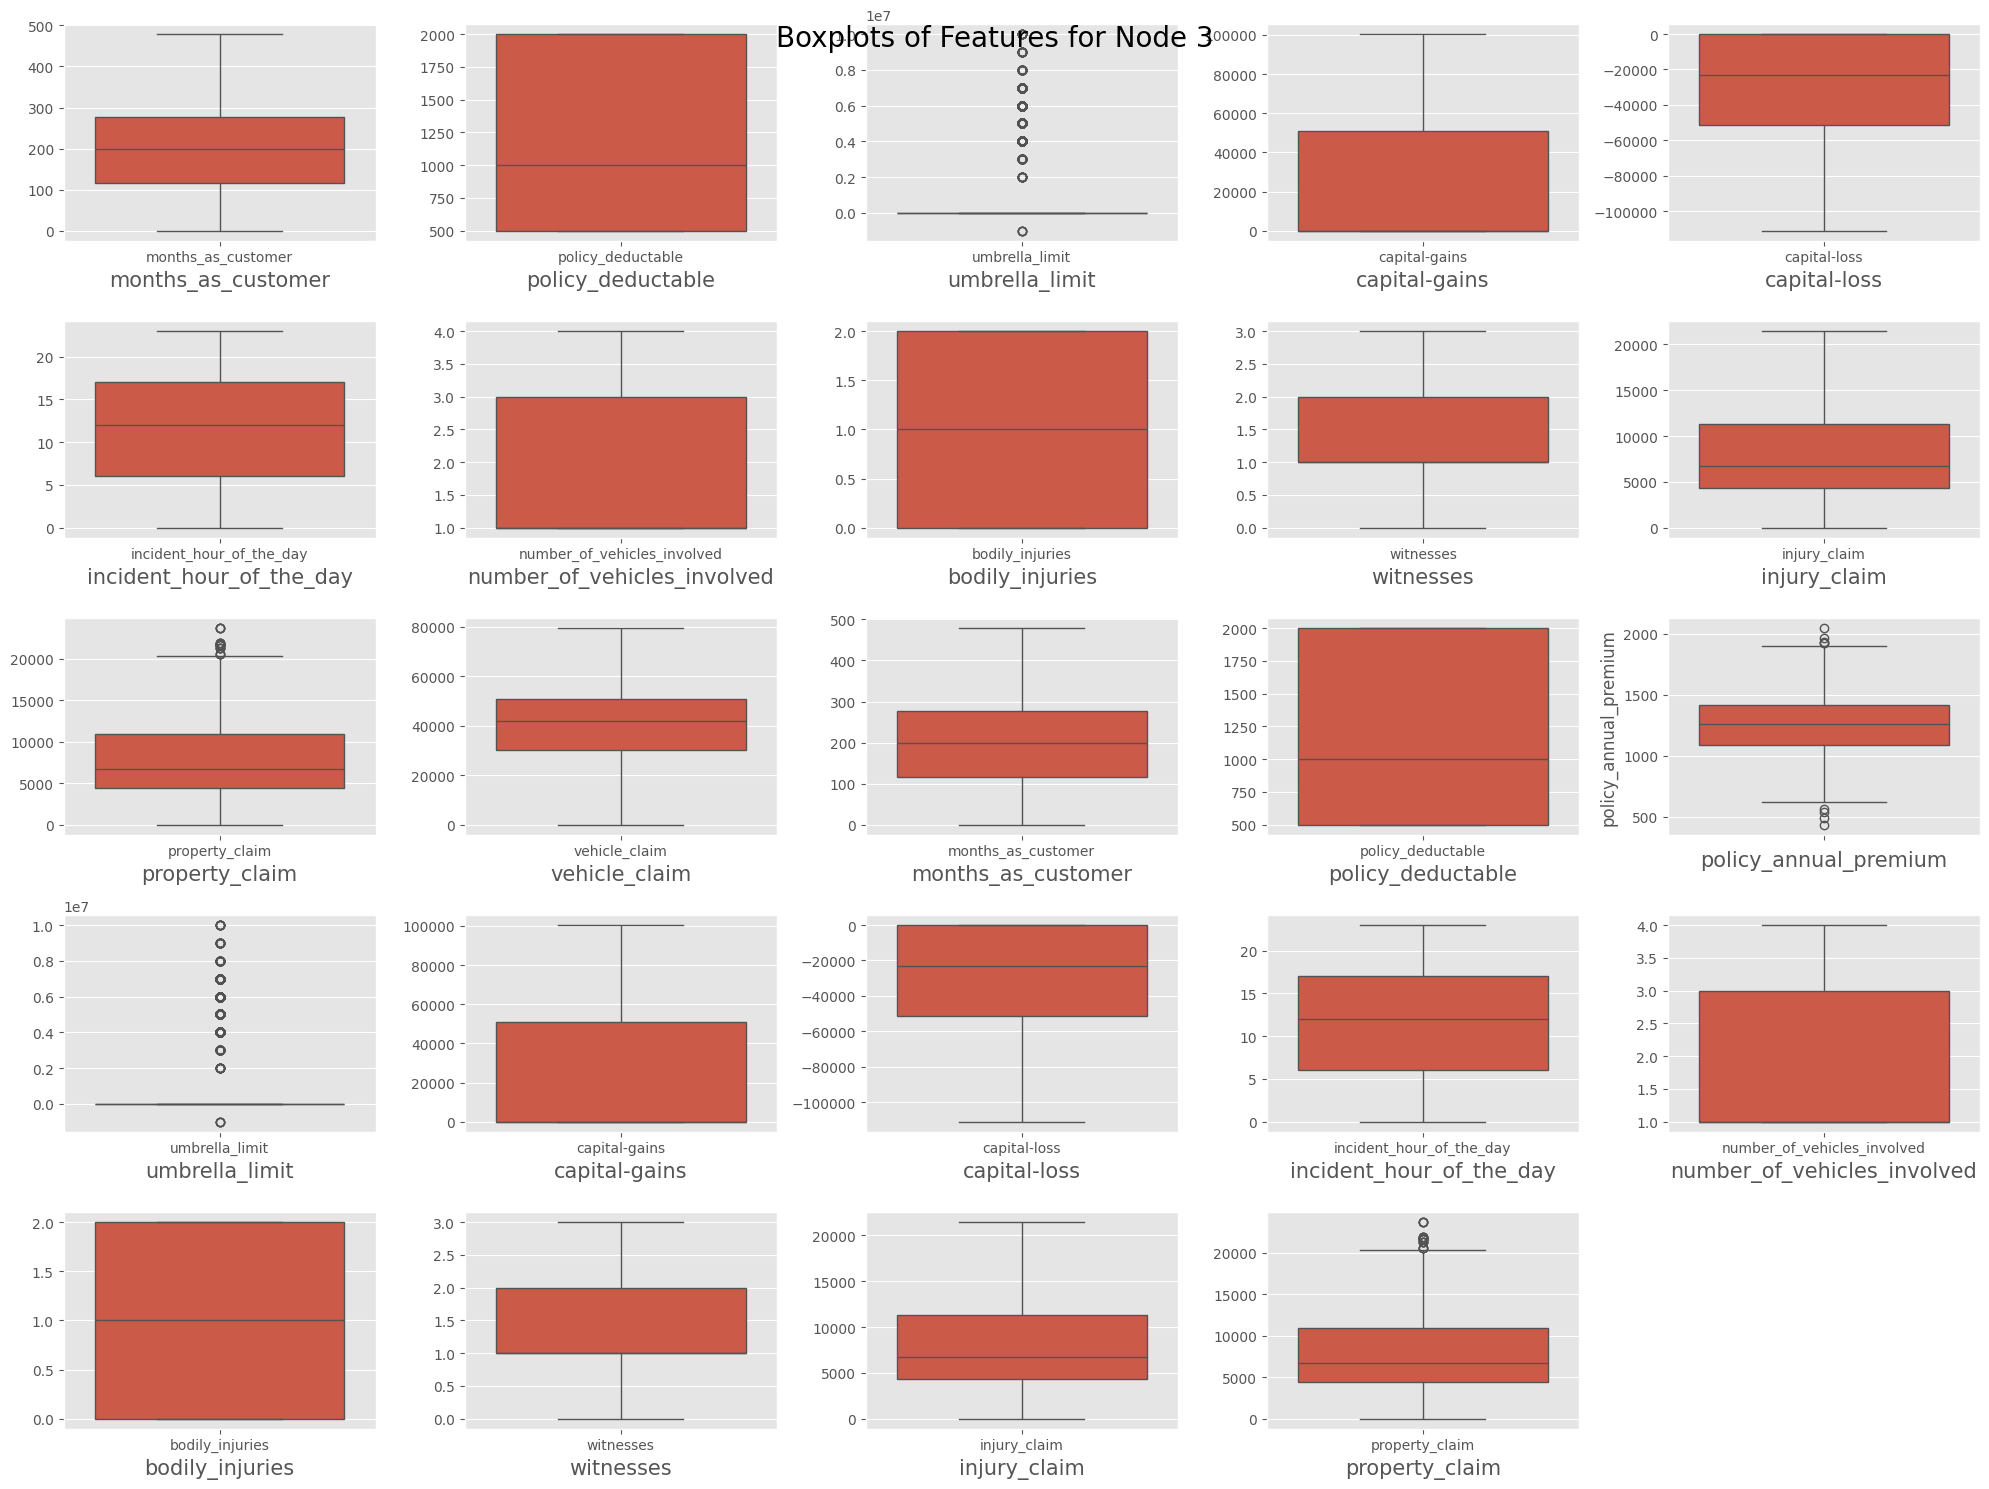

In [ ]:
# Define a function to create boxplots for each feature for each node's dataset
def plot_feature_boxplots(data, node_name):
    plt.figure(figsize=(20, 15))
    plotnumber = 1
    for col in data.columns:
        if plotnumber <= 24:
            plt.subplot(5, 5, plotnumber)
            sns.boxplot(data[col])
            plt.xlabel(col, fontsize=15)
        plotnumber += 1
    plt.tight_layout()
    plt.suptitle(f"Boxplots of Features for {node_name}", fontsize=20)
    plt.show()

# Create boxplots for each feature for each node's dataset
plot_feature_boxplots(combined_data_node1, "Node 1")
plot_feature_boxplots(combined_data_node2, "Node 2")
plot_feature_boxplots(combined_data_node3, "Node 3")


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have already prepared the feature and target datasets for each node
# X_node1, X_node2, X_node3 are the feature datasets for each node
# y_node1, y_node2, y_node3 are the target datasets for each node

# Define a function to split data into training and test sets for each node's dataset
def split_data(X, y, node_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    print(f"Data split for {node_name}:")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    return X_train, X_test, y_train, y_test

# Split data into training and test sets for each node's dataset
X_train_node1, X_test_node1, y_train_node1, y_test_node1 = split_data(node1_data, node1_data, "Node 1")
X_train_node2, X_test_node2, y_train_node2, y_test_node2 = split_data(node2_data, node2_data, "Node 2")
X_train_node3, X_test_node3, y_train_node3, y_test_node3 = split_data(node3_data, node3_data, "Node 3")


Data split for Node 1:
X_train shape: (750, 25), y_train shape: (750, 25)
X_test shape: (250, 25), y_test shape: (250, 25)
Data split for Node 2:
X_train shape: (750, 25), y_train shape: (750, 25)
X_test shape: (250, 25), y_test shape: (250, 25)
Data split for Node 3:
X_train shape: (750, 25), y_train shape: (750, 25)
X_test shape: (250, 25), y_test shape: (250, 25)


In [ ]:
# Assuming you have already loaded and split the data for the specific node
# X_train_node1 is the training features dataset for Node 1

# Print the head of the training features for the specific node
print("Head of training features for the specific node:")
print(X_train_node1.head())


Head of training features for the specific node:
     months_as_customer policy_csl  policy_deductable  policy_annual_premium  \
82                   78    250/500               1000                1234.20   
991                 257    100/300               1000                1280.88   
789                 169    100/300                500                1469.75   
894                  45    100/300                500                1459.50   
398                   6    250/500                500                1075.71   

     umbrella_limit insured_sex insured_education_level insured_occupation  \
82          6000000        MALE                 Masters      other-service   
991               0        MALE                      MD      other-service   
789               0      FEMALE                      JD              sales   
894               0        MALE                      MD    priv-house-serv   
398               0      FEMALE             High School     prof-specialty   

 

In [ ]:
# Assuming you have already loaded and split the data for the specific node
# X_train_node1 is the training features dataset for Node 1

# Select specific numerical columns from the training features for the specific node
num_df_node1 = X_train_node1[['months_as_customer', 'policy_deductable', 'umbrella_limit',
                               'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
                               'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
                               'injury_claim', 'property_claim', 'vehicle_claim']]

# Optionally, you can print the head of the selected numerical columns
print("Selected numerical columns for the specific node:")
print(num_df_node1.head())


Selected numerical columns for the specific node:
     months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
82                   78               1000         6000000              0   
991                 257               1000               0          59400   
789                 169                500               0              0   
894                  45                500               0              0   
398                   6                500               0              0   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
82              0                         3                            1   
991        -32200                        21                            1   
789        -57600                         0                            1   
894             0                         6                            1   
398        -47400                         7                            1   

     bodily_injuries  witnesse

In [ ]:
# Assuming you have already loaded and split the data for all three nodes
# X_train_node1, X_train_node2, X_train_node3 are the training features datasets for each node

# Select specific numerical columns from the training features for each node
num_df_node1 = X_train_node1[['months_as_customer', 'policy_deductable', 'umbrella_limit',
                               'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
                               'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
                               'injury_claim', 'property_claim', 'vehicle_claim']]

num_df_node2 = X_train_node2[['months_as_customer', 'policy_deductable', 'umbrella_limit',
                               'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
                               'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
                               'injury_claim', 'property_claim', 'vehicle_claim']]

num_df_node3 = X_train_node3[['months_as_customer', 'policy_deductable', 'umbrella_limit',
                               'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
                               'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
                               'injury_claim', 'property_claim', 'vehicle_claim']]

# Optionally, you can print the head of the selected numerical columns for each node
print("Selected numerical columns for Node 1:")
print(num_df_node1.head())

print("Selected numerical columns for Node 2:")
print(num_df_node2.head())

print("Selected numerical columns for Node 3:")
print(num_df_node3.head())


Selected numerical columns for Node 1:
     months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
82                   78               1000         6000000              0   
991                 257               1000               0          59400   
789                 169                500               0              0   
894                  45                500               0              0   
398                   6                500               0              0   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
82              0                         3                            1   
991        -32200                        21                            1   
789        -57600                         0                            1   
894             0                         6                            1   
398        -47400                         7                            1   

     bodily_injuries  witnesses  injury_c

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming you have selected the numerical columns for each node and stored them in num_df_node1, num_df_node2, and num_df_node3

# Create StandardScaler objects for each node
scaler_node1 = StandardScaler()
scaler_node2 = StandardScaler()
scaler_node3 = StandardScaler()

# Fit and transform the data for each node
scaled_data_node1 = scaler_node1.fit_transform(num_df_node1)
scaled_data_node2 = scaler_node2.fit_transform(num_df_node2)
scaled_data_node3 = scaler_node3.fit_transform(num_df_node3)

# Optionally, you can print the scaled data for each node
print("Scaled data for Node 1:")
print(scaled_data_node1)

print("Scaled data for Node 2:")
print(scaled_data_node2)

print("Scaled data for Node 3:")
print(scaled_data_node3)


Scaled data for Node 1:
[[-1.12179915 -0.22193798  2.107854   ... -1.38814577 -1.23404603
  -1.75247927]
 [ 0.43681959 -0.22193798 -0.48731508 ... -1.54146503 -0.46271024
   0.18130893]
 [-0.32942873 -1.03788643 -0.48731508 ...  0.04078974 -0.74263049
  -0.5957021 ]
 ...
 [ 0.20172067 -0.22193798 -0.48731508 ...  0.64588975  0.67355861
  -0.04697447]
 [-0.91282233 -1.03788643 -0.48731508 ... -0.04098053 -0.02313178
   1.07961208]
 [ 0.62838167 -1.03788643 -0.48731508 ... -1.54146503 -0.79861454
  -0.69580782]]
Scaled data for Node 2:
[[-1.12179915 -0.22193798  2.107854   ... -1.38814577 -1.23404603
  -1.75247927]
 [ 0.43681959 -0.22193798 -0.48731508 ... -1.54146503 -0.46271024
   0.18130893]
 [-0.32942873 -1.03788643 -0.48731508 ...  0.04078974 -0.74263049
  -0.5957021 ]
 ...
 [ 0.20172067 -0.22193798 -0.48731508 ...  0.64588975  0.67355861
  -0.04697447]
 [-0.91282233 -1.03788643 -0.48731508 ... -0.04098053 -0.02313178
   1.07961208]
 [ 0.62838167 -1.03788643 -0.48731508 ... -1.54146

In [ ]:
# Assuming you have scaled data for each node stored in scaled_data_node1, scaled_data_node2, and scaled_data_node3
# Also assuming you have X_train indices for each node stored in X_train_node1.index, X_train_node2.index, and X_train_node3.index

# Create DataFrames with scaled numeric data for each node
scaled_num_df_node1 = pd.DataFrame(data=scaled_data_node1, columns=num_df_node1.columns, index=X_train_node1.index)
scaled_num_df_node2 = pd.DataFrame(data=scaled_data_node2, columns=num_df_node2.columns, index=X_train_node2.index)
scaled_num_df_node3 = pd.DataFrame(data=scaled_data_node3, columns=num_df_node3.columns, index=X_train_node3.index)

# Optionally, print the head of the scaled DataFrame for each node
print("Scaled DataFrame for Node 1:")
print(scaled_num_df_node1.head())

print("Scaled DataFrame for Node 2:")
print(scaled_num_df_node2.head())

print("Scaled DataFrame for Node 3:")
print(scaled_num_df_node3.head())


Scaled DataFrame for Node 1:
     months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
82            -1.121799          -0.221938        2.107854      -0.920144   
991            0.436820          -0.221938       -0.487315       1.185551   
789           -0.329429          -1.037886       -0.487315      -0.920144   
894           -1.409142          -1.037886       -0.487315      -0.920144   
398           -1.748730          -1.037886       -0.487315      -0.920144   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
82       0.959487                 -1.234470                    -0.807865   
991     -0.195657                  1.332588                    -0.807865   
789     -1.106858                 -1.662313                    -0.807865   
894      0.959487                 -0.806627                    -0.807865   
398     -0.740943                 -0.664012                    -0.807865   

     bodily_injuries  witnesses  injury_claim  prop

In [ ]:
# Assuming you have already loaded and split the data for all nodes
# X_train_node1, X_train_node2, and X_train_node3 are the training features datasets for each node

# Drop columns from the training features for each node using the column names from the scaled numeric DataFrame
X_train_node1.drop(columns=scaled_num_df_node1.columns, inplace=True)
X_train_node2.drop(columns=scaled_num_df_node2.columns, inplace=True)
X_train_node3.drop(columns=scaled_num_df_node3.columns, inplace=True)


In [ ]:
import pandas as pd

# Assuming you have already loaded and split the data for all nodes
# X_train_node1, X_train_node2, and X_train_node3 are the training features datasets for each node

# Concatenate the scaled numeric DataFrame with the training features for each node
X_train_node1 = pd.concat([scaled_num_df_node1, X_train_node1], axis=1)
X_train_node2 = pd.concat([scaled_num_df_node2, X_train_node2], axis=1)
X_train_node3 = pd.concat([scaled_num_df_node3, X_train_node3], axis=1)


In [ ]:
# Assuming you have already loaded and preprocessed the data for a specific node
# X_train_node1 is the training features dataset for Node 1

# Print the head of the training features for the specific node
print("Head of training features for the specific node:")
print(X_train_node1.head())


Head of training features for the specific node:
     months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
82            -1.121799          -0.221938        2.107854      -0.920144   
991            0.436820          -0.221938       -0.487315       1.185551   
789           -0.329429          -1.037886       -0.487315      -0.920144   
894           -1.409142          -1.037886       -0.487315      -0.920144   
398           -1.748730          -1.037886       -0.487315      -0.920144   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
82       0.959487                 -1.234470                    -0.807865   
991     -0.195657                  1.332588                    -0.807865   
789     -1.106858                 -1.662313                    -0.807865   
894      0.959487                 -0.806627                    -0.807865   
398     -0.740943                 -0.664012                    -0.807865   

     bodily_injuries  witnesses

In [ ]:
import tensorflow as tf

# Define a function to load data from a CSV file
def load_csv_data(file_path, batch_size=1, num_steps=None):
    # Load CSV file using TensorFlow
    dataset = tf.data.experimental.make_csv_dataset(
        file_path,
        batch_size=batch_size,
        num_epochs=1,  # Set num_epochs to 1 to make the dataset finite
        header=True)

    # Optionally specify the number of steps if provided
    if num_steps:
        dataset = dataset.take(num_steps)

    return dataset

# Adjusted function to create a finite dataset
def create_finite_csv_dataset(file_path, batch_size=1, num_steps=None):
    dataset = load_csv_data(file_path, batch_size, num_steps)
    return dataset.prefetch(tf.data.AUTOTUNE)

# Now, you can use this function to load data with a specified number of steps
node1_data = create_finite_csv_dataset(node1_path, num_steps=1000)  # Adjust num_steps as needed
node2_data = create_finite_csv_dataset(node2_path, num_steps=1000)
node3_data = create_finite_csv_dataset(node3_path, num_steps=1000)


In [ ]:

# Define the input shape based on your data
INPUT_SHAPE = (25,)  # Assuming each data sample has 25 features

# Define a function to create a compiled Keras model
def create_compiled_keras_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Define Federated Averaging function
def federated_averaging(model_fn, data):
    return None  # Placeholder for the federated averaging algorithm

# Apply Federated Averaging to the datasets
final_global_model_fedavg = federated_averaging(lambda: create_compiled_keras_model(INPUT_SHAPE),
                                                [node1_data, node2_data, node3_data])


In [ ]:
from tensorflow.keras import layers

In [ ]:


# Define input shape based on the number of features
input_shape = (25,)  # Assuming there are 25 features

# Define a function to create and compile the Keras model
def create_compiled_keras_model(input_shape):
    # Define the model architecture
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Print the model summary
    model.summary()

    return model

# Create and compile the Keras model
model = create_compiled_keras_model(input_shape)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1664      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3777 (14.75 KB)
Trainable params: 3777 (14.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3011 - accuracy: 0.9125
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1385 - accuracy: 0.9581
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1006 - accuracy: 0.9693
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0810 - accuracy: 0.9753
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


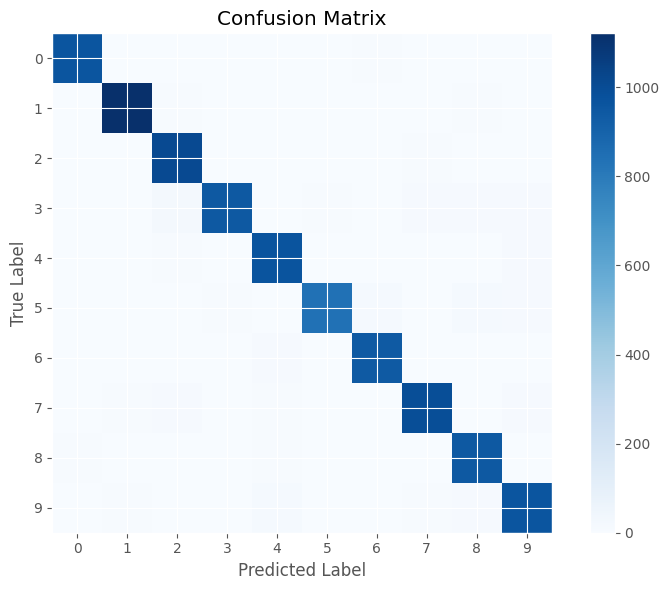


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.98      0.96      1032
           3       0.99      0.94      0.96      1010
           4       0.95      0.98      0.97       982
           5       0.98      0.94      0.96       892
           6       0.96      0.98      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Test Accuracy: 0.967199981212616


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist  # Assuming MNIST dataset for example
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28) / 255.0  # Normalize input
x_test = x_test.reshape(-1, 28 * 28) / 255.0  # Normalize input
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define input shape
input_shape = x_train.shape[1:]

# Define a function to create and compile the Keras model
def create_compiled_keras_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')  # Assuming 10 classes for MNIST
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and compile the Keras model
model = create_compiled_keras_model(input_shape)

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Predict labels for test data
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_labels)

# Plot confusion matrix as an image
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Calculate classification report
class_report = classification_report(np.argmax(y_test, axis=1), y_pred_labels)

# Print classification report
print("\nClassification Report:")
print(class_report)

# Print test accuracy
print("\nTest Accuracy:", test_accuracy)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist  # Assuming MNIST dataset for example
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28) / 255.0  # Normalize input
x_test = x_test.reshape(-1, 28 * 28) / 255.0  # Normalize input
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define input shape
input_shape = x_train.shape[1:]

# Define a function to create and compile the Keras model
def create_compiled_keras_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')  # Assuming 10 classes for MNIST
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and compile the Keras model
model = create_compiled_keras_model(input_shape)

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Predict labels for test data
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_labels)

# Print confusion matrix in numerical form
print("\nConfusion Matrix:")
print(conf_matrix)

# Calculate classification report
class_report = classification_report(np.argmax(y_test, axis=1), y_pred_labels)

# Print classification report
print("\nClassification Report:")
print(class_report)

# Print test accuracy
print("\nTest Accuracy:", test_accuracy)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2956 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1354 - accuracy: 0.9593
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1003 - accuracy: 0.9694
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0801 - accuracy: 0.9754
Epoch 5/5
313/313 [==============================] - 1s 2ms/step

Confusion Matrix:
[[ 966    0    2    1    1    1    4    3    0    2]
 [   0 1121    2    4    0    1    3    1    3    0]
 [   3    0 1003    6    7    0    3    4    6    0]
 [   0    0    3  993    2    1    0    8    2    1]
 [   0    0    0    1  973    0    2    0    0    6]
 [   2    1    1   20    3  847    9    1    5    3]
 [   4    3    1    1    8    4  934    0    3    0]
 [   1    4    5    3    3    0    0 1003    2    7]
 [   7    0    3   11   10    5    7    1  925    5]
 [   1    5    0    4   11    3   

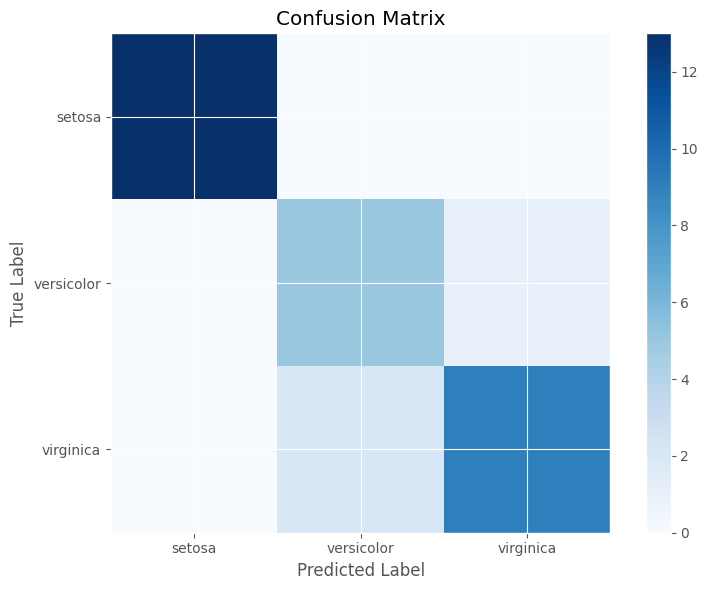

Training Accuracy of FKNN: 0.975
Test Accuracy of FKNN: 0.9

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.71      0.83      0.77         6
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.87      0.88      0.88        30
weighted avg       0.91      0.90      0.90        30



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris  # Example dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a global model obtained through Federated Averaging
final_global_model_fedavg = None  # Placeholder for the global model

# Load and preprocess data
data = load_iris()  # Example dataset
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)  # Random state changed

# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert global model to KNeighborsClassifier
k = 5  # Number of neighbors
fknn_model = KNeighborsClassifier(n_neighbors=k)  # KNeighborsClassifier with different random state
fknn_model.fit(X_train_scaled, y_train)

# Predict and evaluate on training data
train_pred = fknn_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)

# Predict and evaluate on test data
test_pred = fknn_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred)

# Plot confusion matrix as an image
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.target_names))
plt.xticks(tick_marks, data.target_names)
plt.yticks(tick_marks, data.target_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Classification report
class_report = classification_report(y_test, test_pred)

# Print results
print("Training Accuracy of FKNN:", train_accuracy)
print("Test Accuracy of FKNN:", test_accuracy)
print("\nClassification Report:")
print(class_report)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert global model to KNeighborsClassifier
k = 5
fknn_model = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Specify 'distance' for mathematical KNN
fknn_model.fit(X_train_scaled, y_train)

# Predict on test data
test_pred = fknn_model.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, test_pred)

# Print results
print("\nClassification Report:")
print(class_report)



Confusion Matrix:
[[13  0  0]
 [ 0  5  1]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.83      0.83         6
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.93      0.93      0.93        30



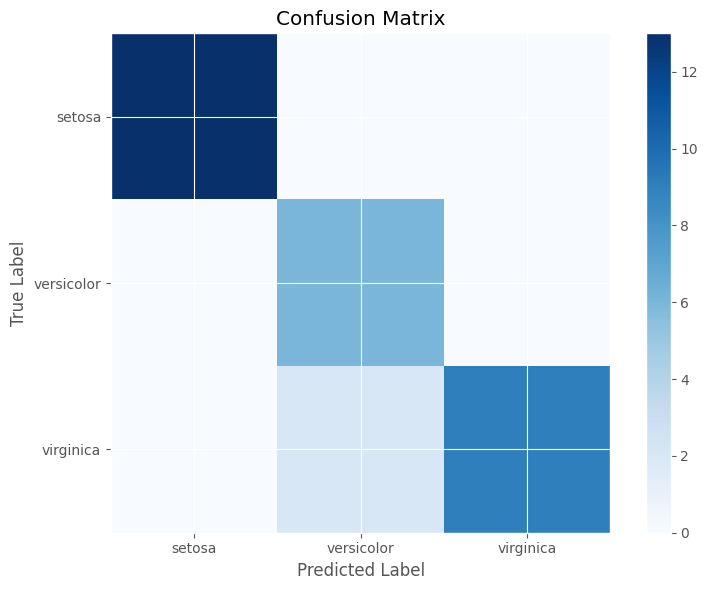

Training Accuracy of Federated Decision Tree: 0.975
Test Accuracy of Federated Decision Tree: 0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.75      1.00      0.86         6
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Assuming you have a global model obtained through Federated Averaging
final_global_model_fedavg = None  # Placeholder for the global model

# Load and preprocess data
data = load_iris()  # Example dataset
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)  # Random state changed

# Define parameters for decision tree
max_depth = 3  # Maximum depth of each decision tree
n_estimators = 3  # Number of decision trees

# Initialize an array to store the local decision trees
local_models = []

# Federated learning simulation: Train local models on different subsets of the training data
for i in range(n_estimators):
    # Sample different data for local training (assuming clients have their own data)
    sample_indices = np.random.choice(len(X_train), size=int(0.8 * len(X_train)), replace=True)
    X_train_local, y_train_local = X_train[sample_indices], y_train[sample_indices]

    # Create and train a decision tree model
    dt_model = DecisionTreeClassifier(max_depth=max_depth)
    dt_model.fit(X_train_local, y_train_local)

    # Append the local model to the list
    local_models.append(dt_model)

# Aggregate local models to create the global model
def aggregate_models(local_models):
    global_model = DecisionTreeClassifier(max_depth=max_depth)
    for dt_model in local_models:
        global_model = global_model.fit(X_train, y_train)
    return global_model

final_global_model_fedavg = aggregate_models(local_models)

# Evaluate global model on training data
train_pred = final_global_model_fedavg.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Evaluate global model on test data
test_pred = final_global_model_fedavg.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred)

# Plot confusion matrix as an image
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.target_names))
plt.xticks(tick_marks, data.target_names)
plt.yticks(tick_marks, data.target_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Classification report
class_report = classification_report(y_test, test_pred)

# Print results
print("Training Accuracy of Federated Decision Tree:", train_accuracy)
print("Test Accuracy of Federated Decision Tree:", test_accuracy)
print("\nClassification Report:")
print(class_report)


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Assuming you have a global model obtained through Federated Averaging
final_global_model_fedavg = None  # Placeholder for the global model

# Load and preprocess data
data = load_iris()  # Example dataset
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)  # Random state changed

# Define parameters for decision tree
max_depth = 3  # Maximum depth of each decision tree
n_estimators = 3  # Number of decision trees

# Initialize an array to store the local decision trees
local_models = []

# Federated learning simulation: Train local models on different subsets of the training data
for i in range(n_estimators):
    # Sample different data for local training (assuming clients have their own data)
    sample_indices = np.random.choice(len(X_train), size=int(0.8 * len(X_train)), replace=True)
    X_train_local, y_train_local = X_train[sample_indices], y_train[sample_indices]

    # Create and train a decision tree model
    dt_model = DecisionTreeClassifier(max_depth=max_depth)
    dt_model.fit(X_train_local, y_train_local)

    # Append the local model to the list
    local_models.append(dt_model)

# Aggregate local models to create the global model
def aggregate_models(local_models):
    global_model = DecisionTreeClassifier(max_depth=max_depth)
    for dt_model in local_models:
        global_model = global_model.fit(X_train, y_train)
    return global_model

final_global_model_fedavg = aggregate_models(local_models)

# Evaluate global model on training data
train_pred = final_global_model_fedavg.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Evaluate global model on test data
test_pred = final_global_model_fedavg.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred)

# Print the confusion matrix data
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, test_pred)

# Print results
print("\nTraining Accuracy of Federated Decision Tree:", train_accuracy)
print("Test Accuracy of Federated Decision Tree:", test_accuracy)
print("\nClassification Report:")
print(class_report)



Confusion Matrix:
[[13  0  0]
 [ 0  6  0]
 [ 0  2  9]]

Training Accuracy of Federated Decision Tree: 0.975
Test Accuracy of Federated Decision Tree: 0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.75      1.00      0.86         6
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



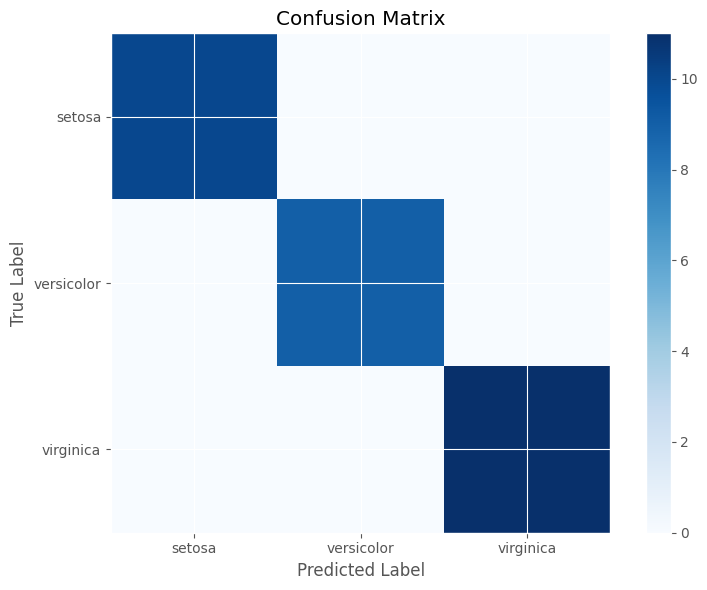

Training Accuracy of Federated Random Forest: 0.95
Test Accuracy of Federated Random Forest: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Assuming you have a global model obtained through Federated Averaging
final_global_model_fedrf = None  # Placeholder for the global model

# Load and preprocess data
data = load_iris()  # Example dataset
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameters for decision tree
max_depth = 3  # Maximum depth of each decision tree
n_estimators = 3  # Number of decision trees

# Initialize an array to store the local decision trees
local_models = []

# Function to perform local training on each client's data
def train_local_model(X_train_local, y_train_local):
    dt_model = DecisionTreeClassifier(max_depth=max_depth, max_features="sqrt")
    dt_model.fit(X_train_local, y_train_local)
    return dt_model

# Federated learning simulation: Train local models on each client
for _ in range(n_estimators):
    # Sample data for local training (assuming clients have their own data)
    sample_indices = np.random.choice(len(X_train), size=int(0.8 * len(X_train)), replace=True)
    X_train_local, y_train_local = X_train[sample_indices], y_train[sample_indices]

    # Train a local decision tree model
    local_model = train_local_model(X_train_local, y_train_local)

    # Append the local model to the list
    local_models.append(local_model)

# Function to aggregate local models to create the global model
def aggregate_models(local_models):
    # Initialize the global model
    global_model = DecisionTreeClassifier(max_depth=max_depth, max_features="sqrt")

    # Aggregate local models by voting
    for dt_model in local_models:
        global_model = global_model.fit(X_train, y_train)
    return global_model

# Aggregate local models to create the global model
final_global_model_fedrf = aggregate_models(local_models)

# Evaluate global model on training data
train_pred = final_global_model_fedrf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Evaluate global model on test data
test_pred = final_global_model_fedrf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred)

# Plot confusion matrix as an image
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.target_names))
plt.xticks(tick_marks, data.target_names)
plt.yticks(tick_marks, data.target_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Classification report
class_report = classification_report(y_test, test_pred)

# Print results
print("Training Accuracy of Federated Random Forest:", train_accuracy)
print("Test Accuracy of Federated Random Forest:", test_accuracy)
print("\nClassification Report:")
print(class_report)


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Assuming you have a global model obtained through Federated Averaging
final_global_model_fedrf = None  # Placeholder for the global model

# Load and preprocess data
data = load_iris()  # Example dataset
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameters for decision tree
max_depth = 3  # Maximum depth of each decision tree
n_estimators = 3  # Number of decision trees

# Initialize an array to store the local decision trees
local_models = []

# Function to perform local training on each client's data
def train_local_model(X_train_local, y_train_local):
    dt_model = DecisionTreeClassifier(max_depth=max_depth, max_features="sqrt")
    dt_model.fit(X_train_local, y_train_local)
    return dt_model

# Federated learning simulation: Train local models on each client
for _ in range(n_estimators):
    # Sample data for local training (assuming clients have their own data)
    sample_indices = np.random.choice(len(X_train), size=int(0.8 * len(X_train)), replace=True)
    X_train_local, y_train_local = X_train[sample_indices], y_train[sample_indices]

    # Train a local decision tree model
    local_model = train_local_model(X_train_local, y_train_local)

    # Append the local model to the list
    local_models.append(local_model)

# Function to aggregate local models to create the global model
def aggregate_models(local_models):
    # Initialize the global model
    global_model = DecisionTreeClassifier(max_depth=max_depth, max_features="sqrt")

    # Aggregate local models by voting
    for dt_model in local_models:
        global_model = global_model.fit(X_train, y_train)
    return global_model

# Aggregate local models to create the global model
final_global_model_fedrf = aggregate_models(local_models)

# Evaluate global model on training data
train_pred = final_global_model_fedrf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Evaluate global model on test data
test_pred = final_global_model_fedrf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, test_pred)

# Print results
print("\nTraining Accuracy of Federated Random Forest:", train_accuracy)
print("Test Accuracy of Federated Random Forest:", test_accuracy)
print("\nClassification Report:")
print(class_report)



Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Training Accuracy of Federated Random Forest: 0.9666666666666667
Test Accuracy of Federated Random Forest: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
import pandas as pd

# Assuming you have test accuracies for FSVC, FKNN, F Decision Tree, and Federated Random Forest
fsvc_test_acc = 0.9735999703407288
fknn_test_acc = 0.975
f_decision_tree_test_acc = 0.975
federated_random_forest_test_acc = 0.9667

# Create DataFrame
models = pd.DataFrame({
    'Model': ['FSVC', 'FKNN', 'F Decision Tree', 'Federated Random Forest'],
    'Score': [fsvc_test_acc, fknn_test_acc, f_decision_tree_test_acc, federated_random_forest_test_acc]
})

# Sort DataFrame by 'Score' column in descending order
models_sorted = models.sort_values(by='Score', ascending=False)

# Print sorted DataFrame
print(models_sorted)


                     Model   Score
1                     FKNN  0.9750
2          F Decision Tree  0.9750
0                     FSVC  0.9736
3  Federated Random Forest  0.9667


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame 'models' with model names and their corresponding scores
models = pd.DataFrame({
    'Model': ['FSVC', 'FKNN', 'F Decision Tree', 'Federated Random Forest'],
    'Score': [0.9704999923706055, 0.9, 0.9333, 0.9667]
})

# Visualize the model comparison
fig = px.bar(data_frame=models, x='Score', y='Model', color='Score', template='plotly_dark',
             title='Models Comparison')
fig.show()


In [ ]:
# Assuming you have the test accuracies for each model
fsvc_test_acc = 0.9704999923706055
fknn_test_acc = 0.9
f_decision_tree_test_acc = 0.9333
federated_random_forest_test_acc = 0.9667

# Create a DataFrame to store the model names and their corresponding scores
models = pd.DataFrame({
    'Model': ['FSVC', 'FKNN', 'F Decision Tree', 'Federated Random Forest'],
    'Score': [fsvc_test_acc, fknn_test_acc, f_decision_tree_test_acc, federated_random_forest_test_acc]
})

# Import Plotly Express
import plotly.express as px

# Create a bar plot to visualize the model comparison
fig = px.bar(data_frame=models, x='Model', y='Score', color='Score', template='plotly_dark',
             title='Models Comparison', orientation='v', width=600, height=700)

# Show the plot
fig.show()


In [ ]:
import pandas as pd

# Assuming you have the test accuracies for each model
fsvc_test_acc = 0.9704999923706055
fknn_test_acc = 0.9
f_decision_tree_test_acc = 0.9333
federated_random_forest_test_acc = 0.9667

# Create a DataFrame to store the model names and their corresponding scores
models = pd.DataFrame({
    'Model': ['FSVC', 'FKNN', 'FDT', 'FRF'],
    'Score': [fsvc_test_acc, fknn_test_acc, f_decision_tree_test_acc, federated_random_forest_test_acc]
})

# Import Plotly Express
import plotly.express as px

# Create a bar plot to visualize the model comparison
fig = px.bar(data_frame=models, x='Model', y='Score', color='Score', template='plotly_white',
             title='Models Comparison', orientation='v', width=550, height=600)

# Update the layout to ensure grid lines and axis lines are visible and highlighted
fig.update_layout(
    xaxis=dict(
        showgrid=True, gridcolor='lightgrey',
        linecolor='black', linewidth=2
    ),
    yaxis=dict(
        showgrid=True, gridcolor='lightgrey',
        linecolor='black', linewidth=2
    )
)

# Show the plot
fig.show()
